In [ ]:
# Análisis Exploratorio y Preprocesamiento de Datos
# Grupo 23
# Integrantes: Martin Laurito, Lucas Franciulli, Dante Alejandro Finci

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from google.colab import drive

warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
#drive.mount('/content/drive')
ds_hotels = pd.read_csv("./hotels_train.csv")
#ds_hotels = pd.read_csv("./drive/MyDrive/datasets/hotels_train.csv")
ds = ds_hotels.copy() 
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
# Se va porque ya no esta reservation_status
ds.drop(columns="reservation_status_date", inplace=True)

# **Analisis inicial**

# Observaciones:
*  La variable company tiene una gran cantidad de datos faltantes y poca correlacion con el target porque le podriamos removerla.
 Si se decide mantenerla podriamos de float a string para que se pueda trabajar sobre ella como una variable cualitativa.

*  Hay varias variables como previous_cancellations y adults donde hat muchos valores "outlier" que estan muy lejos de la norma y aparecen muy escasamente por lo que quizas habria que discretarlas.

*  Las filas con adults=0 parecerian ser errores 


In [ ]:
# Tipo de variables
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61913 entries, 0 to 61912
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61913 non-null  object 
 1   lead_time                       61913 non-null  int64  
 2   arrival_date_year               61913 non-null  int64  
 3   arrival_date_month              61913 non-null  object 
 4   arrival_date_week_number        61913 non-null  int64  
 5   arrival_date_day_of_month       61913 non-null  int64  
 6   stays_in_weekend_nights         61913 non-null  int64  
 7   stays_in_week_nights            61913 non-null  int64  
 8   adults                          61913 non-null  int64  
 9   children                        61909 non-null  float64
 10  babies                          61913 non-null  int64  
 11  meal                            61913 non-null  object 
 12  country                         

In [ ]:
ds.tail()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
61908,Resort Hotel,24,2017,January,4,27,0,2,2,0.0,0,BB,ESP,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,240.0,NaN,0,Transient,48.00,0,1,32bffef5-5404-4e86-9f39-fd2282e1ad7f,1
61909,City Hotel,0,2016,September,36,2,0,1,1,0.0,0,SC,FRA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,149.00,0,0,cc922a1c-356e-42a5-a984-0b1af03c2f5c,0
61910,City Hotel,10,2017,May,19,8,1,2,1,0.0,0,BB,FRA,Aviation,Corporate,0,0,0,A,A,0,No Deposit,NaN,153.0,0,Transient,95.00,0,0,76fb0e83-59df-43ee-9c33-aec51030ed45,0
61911,Resort Hotel,143,2015,October,41,10,2,5,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,96.0,NaN,0,Transient,36.05,0,0,01906859-1094-4e37-b13e-b015b594d159,1
61912,City Hotel,57,2016,April,17,17,2,5,2,0.0,0,HB,ISR,Online TA,TA/TO,0,0,0,D,D,1,No Deposit,9.0,NaN,0,Transient,143.29,0,0,7137e599-4442-41fb-b147-4aba9f344e38,1


In [ ]:
ds.deposit_type.value_counts()/len(ds)*100

No Deposit    83.924540
Non Refund    15.849726
Refundable     0.209610
Name: deposit_type, dtype: float64

# Variables Cuantitativas:
* lead_time, arrival_date_year, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, is_repeated_guest, previous_cancellations, 
previous_bookings_not_canceled, booking_changes, agent, days_in_waiting_list, adr, required_car_parking_spaces, total_of_special_requests, is_canceled

# Variables Cualitativas: 
* hotel, arrival_date_month, meal, country, market_segment, distribution_channel, reserved_room_type, assigned_room_type, deposit_type, company, customer_type, id	


In [ ]:
# Variables Cuantitativas: calculo medidas de resumen
var_cuant = ["lead_time", "arrival_date_year", "arrival_date_week_number", 
"arrival_date_day_of_month", "stays_in_weekend_nights", "stays_in_week_nights", "adults", 
"children", "babies", "is_repeated_guest", "previous_cancellations", 
"previous_bookings_not_canceled", "booking_changes", "agent", "days_in_waiting_list", "adr", 
"required_car_parking_spaces", "total_of_special_requests", "is_canceled"]

def describir(array):
    for var in array:
      display(ds[var].describe())
describir(var_cuant)

count    61596.000000
mean       112.057731
std        110.689711
min          0.000000
25%         23.000000
50%         77.000000
75%        171.000000
max        629.000000
Name: lead_time, dtype: float64

count    61596.000000
mean      2016.156634
std          0.707581
min       2015.000000
25%       2016.000000
50%       2016.000000
75%       2017.000000
max       2017.000000
Name: arrival_date_year, dtype: float64

count    61596.000000
mean        27.197107
std         13.523148
min          1.000000
25%         16.000000
50%         28.000000
75%         38.000000
max         53.000000
Name: arrival_date_week_number, dtype: float64

count    61596.000000
mean        15.794922
std          8.792971
min          1.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         31.000000
Name: arrival_date_day_of_month, dtype: float64

count    61596.000000
mean         0.923696
std          0.992850
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         16.000000
Name: stays_in_weekend_nights, dtype: float64

count    61596.000000
mean         2.508962
std          1.882790
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         40.000000
Name: stays_in_week_nights, dtype: float64

count    61596.000000
mean         1.864959
std          0.472075
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          5.000000
Name: adults, dtype: float64

count    61592.000000
mean         0.101458
std          0.394656
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: children, dtype: float64

count    61596.000000
mean         0.007030
std          0.084898
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: babies, dtype: float64

count    61596.000000
mean         0.027648
std          0.163963
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: is_repeated_guest, dtype: float64

count    61596.000000
mean         0.077213
std          0.358646
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         13.000000
Name: previous_cancellations, dtype: float64

count    61596.000000
mean         0.115835
std          1.399689
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         70.000000
Name: previous_bookings_not_canceled, dtype: float64

count    61596.000000
mean         0.194688
std          0.605617
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         17.000000
Name: booking_changes, dtype: float64

count    53776.000000
mean        84.600547
std        109.590320
min          1.000000
25%          9.000000
50%         12.000000
75%        220.000000
max        535.000000
Name: agent, dtype: float64

count    61596.000000
mean         2.644376
std         18.645167
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        391.000000
Name: days_in_waiting_list, dtype: float64

count    61596.000000
mean       102.629992
std         47.646058
min         -6.380000
25%         70.000000
50%         95.000000
75%        126.000000
max        510.000000
Name: adr, dtype: float64

count    61596.000000
mean         0.049987
std          0.218812
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: required_car_parking_spaces, dtype: float64

count    61596.000000
mean         0.523995
std          0.775419
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: total_of_special_requests, dtype: float64

count    61596.000000
mean         0.499237
std          0.500003
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: is_canceled, dtype: float64

In [ ]:
# Variables Cualitativas: reporte de los posibles valores que toman y cuán
# frecuentemente lo hacen.
var_cual = ["hotel", "arrival_date_month", "meal", "country", "market_segment", 
"distribution_channel", "reserved_room_type", "assigned_room_type", "deposit_type", "company", 
"customer_type", "id"]
def conteo_de_valores(array):
    for var in array:
        display(ds[var].value_counts())
conteo_de_valores(var_cual)

City Hotel      41929
Resort Hotel    19667
Name: hotel, dtype: int64

August       7149
July         6483
May          6144
April        5863
October      5824
June         5764
September    5538
March        4879
February     4108
December     3465
November     3391
January      2988
Name: arrival_date_month, dtype: int64

BB           47640
HB            7411
SC            5510
Undefined      591
FB             444
Name: meal, dtype: int64

PRT    27797
GBR     5723
FRA     4788
ESP     4199
DEU     3303
       ...  
HND        1
FJI        1
LIE        1
ATA        1
RWA        1
Name: country, Length: 149, dtype: int64

Online TA        29138
Offline TA/TO    12318
Groups           11469
Direct            5726
Corporate         2480
Complementary      351
Aviation           112
Undefined            2
Name: market_segment, dtype: int64

TA/TO        51605
Direct        6765
Corporate     3133
GDS             89
Undefined        4
Name: distribution_channel, dtype: int64

A    44959
D     9579
E     3239
F     1448
G     1088
C      482
B      466
H      334
L        1
Name: reserved_room_type, dtype: int64

A    39859
D    12182
E     3771
F     1820
G     1273
C     1126
B      951
H      384
I      143
K       86
L        1
Name: assigned_room_type, dtype: int64

No Deposit    51453
Non Refund    10065
Refundable       78
Name: deposit_type, dtype: int64

40.0     390
223.0    364
67.0     169
45.0     117
153.0    105
        ... 
258.0      1
243.0      1
370.0      1
528.0      1
160.0      1
Name: company, Length: 274, dtype: int64

Transient          47221
Transient-Party    12092
Contract            2031
Group                252
Name: customer_type, dtype: int64

7aa4cc6b-b92c-4061-b21d-4f9e0cac4689    1
df5d1ffa-eee0-4e79-b5a6-21f02c030e82    1
b442e553-c108-440f-8bf4-3a79d45e716c    1
c8e19318-10f5-4f61-a637-99ee6ae623c3    1
2819ef6e-f93e-4410-b27e-07dbc2209500    1
                                       ..
0d886e54-cbaf-4cd1-8997-95a74aa13783    1
ccd58d28-96ea-4dc0-bb22-64e6fbbef6e6    1
136f0dc4-424c-446d-9cf7-229ce4efbf0b    1
4dda8d58-4dbb-4bcf-9805-089a77c67553    1
7137e599-4442-41fb-b147-4aba9f344e38    1
Name: id, Length: 61596, dtype: int64

In [ ]:
display(ds.columns)

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'id',
       'is_canceled'],
      dtype='object')

# **Variables irrelevantes para el análisis**

Existen diversas variables que no nos aportan informacion importante a nuestro analisis. Entre ellas se encuentran:

  ***meal***: Esta variable solo nos dice si el huesped tenia planeado comer en el hotel y si es asi cuantas comidas tenia pensado comer en dicho hotel lo que no sirve para sacar ninguna conclusion certera respecto de si cancelo la reserva o no.

  ***is_canceled*** y ***id***: Son distintas para cada huesped por lo que no hay ningún análisis que pueda derivar de ellas.

A continuacion vamos a analizar las variables *distribution_channel* y *required_car_parking_spaces* para concluir si son irrelevantes o no.


En el proximo grafico vamos a ver la distribucion de los posibles valores que toma *distribution_channel*



<Axes: ylabel='distribution_channel'>

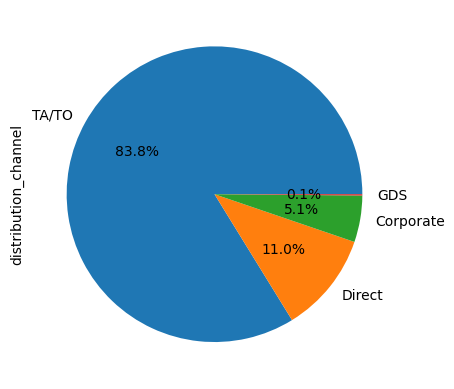

In [ ]:
# Analisis de distribution_channel
nuevo_ds_temporal = ds['distribution_channel'].value_counts().drop("Undefined")
nuevo_ds_temporal.plot.pie(autopct='%1.1f%%')

Como podemos observar la inmensa mayoria de posibles variables que toma la columna de *distribution_channel* son **TA/TO**. 
En el proximo grafico veremos la el porcentaje de cada posible valor de distribution_channel que cancelo su reversa.

distribution_channel
Corporate    32.077881
Direct       25.868441
GDS          29.213483
TA/TO        54.192423
Name: is_canceled, dtype: float64


(0.0, 100.0)

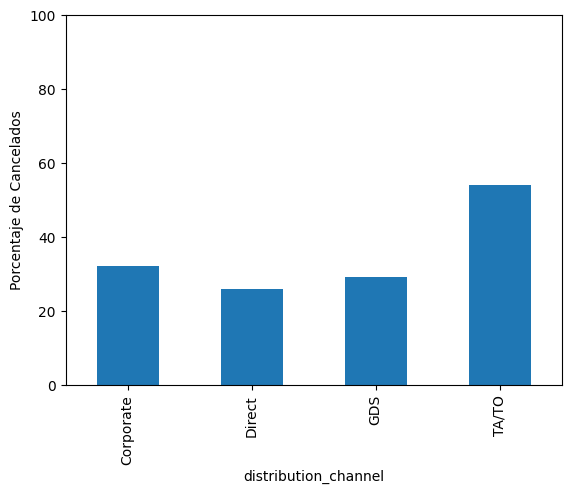

In [ ]:
serie_sin_undefined = ds[ds['distribution_channel'] != 'Undefined']
cantidad_cancelados = serie_sin_undefined.groupby('distribution_channel')['is_canceled'].mean()*100
print(cantidad_cancelados)
relacion_channel_cancelados = cantidad_cancelados.plot(kind='bar')
relacion_channel_cancelados.set_xlabel('distribution_channel')
relacion_channel_cancelados.set_ylabel('Porcentaje de Cancelados')
relacion_channel_cancelados.set_ylim(0, 100)

Como podemos observar la variable **TA/TO** (que recordemos que representa al *83.8%* de los *distribution_channel*) cancelo las reservas un *54.21%* de las veces. Por ende esta columna nos proporciona informacion relevante.

A continuacion vamos analizar el caso de *required_car_parking_spaces*

0    58841
1     3058
2       12
8        1
3        1
Name: required_car_parking_spaces, dtype: int64
Porcentaje de valores que toman el 0:  95.03819876278003


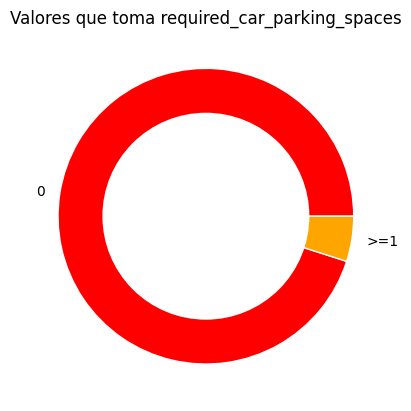

In [ ]:
nuevo_ds_temporal = ds['required_car_parking_spaces'].value_counts()
print(nuevo_ds_temporal)
nuevo_ds_temporal = ds['required_car_parking_spaces'].value_counts().drop(8).drop(3).drop(2)
labels = ['0', '>=1']
colors = ['red', 'orange']
plt.pie(nuevo_ds_temporal, labels=labels, colors=colors, wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Valores que toma required_car_parking_spaces')
print("Porcentaje de valores que toman el 0: ",(nuevo_ds_temporal[0]*100)/61913)

Como podemos observar, el porcentaje de valores que toman el 0 es del 95.03%. Minetras que el restante 4.97% toma un valor mayor o igual a 1. Ahora observemos que valores de *is_canceled* toma cada uno.

required_car_parking_spaces
0    52.584083
1     0.000000
2     0.000000
3     0.000000
8     0.000000
Name: is_canceled, dtype: float64


(0.0, 100.0)

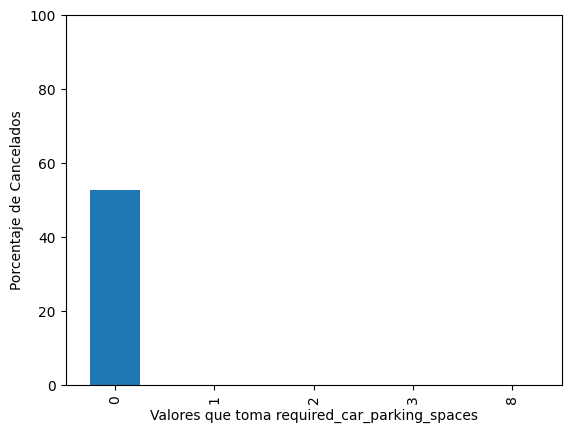

In [ ]:
serie_requered_car_parking_spaces = ds.groupby('required_car_parking_spaces')['is_canceled'].mean()*100
print(serie_requered_car_parking_spaces)
relacion_channel_cancelados = serie_requered_car_parking_spaces.plot(kind='bar')
relacion_channel_cancelados.set_xlabel('Valores que toma required_car_parking_spaces')
relacion_channel_cancelados.set_ylabel('Porcentaje de Cancelados')
relacion_channel_cancelados.set_ylim(0, 100)

De los graficos anteriores podemos llegar a la conclusion de que si la variable *required_car_parking_spaces* toma un valores diferente a 0 este NO cancela su reserva, en cambio en el caso contrario tiene un 52.58% de chances de hacerlo. Por lo tanto concluimos que la variable *required_car_parking_spaces* es necesaria para el analisis

# Análisis gráfico de las distribuciones de algunas de las variables mas representativas

Variable: *is_canceled*

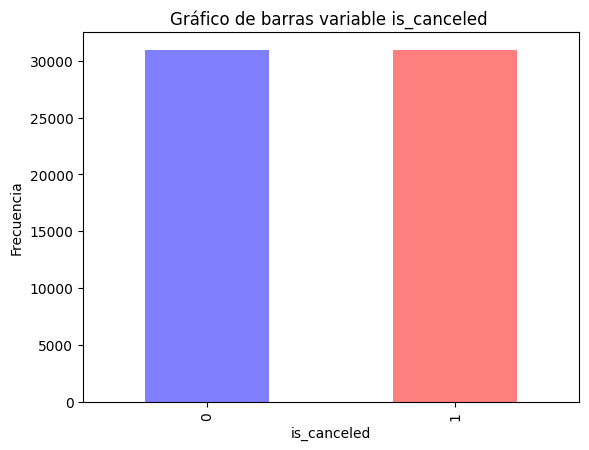

In [ ]:
# análisis gráfico de las distribuciones de algunas de las variables mas 
colores=[(0,0,1),(1,0,0), (0,1,0)]
grf=ds['is_canceled'].value_counts().plot.bar(alpha=0.5,color=colores, title="Gráfico de barras variable is_canceled ", xlabel="is_canceled",ylabel="Frecuencia") 

Variable: *is_repeated_guest*

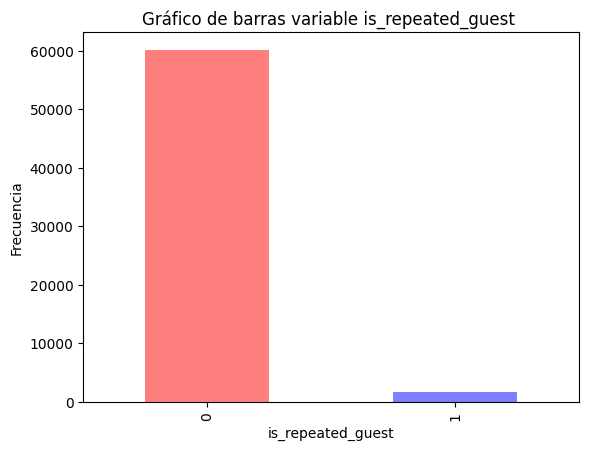

In [ ]:
colores=[(1,0,0),(0,0,1)]
grf=ds['is_repeated_guest'].value_counts().plot.bar(alpha=0.5,color=colores, title="Gráfico de barras variable is_repeated_guest ", xlabel="is_repeated_guest",ylabel="Frecuencia") 

Variable: *previous_cancellations*

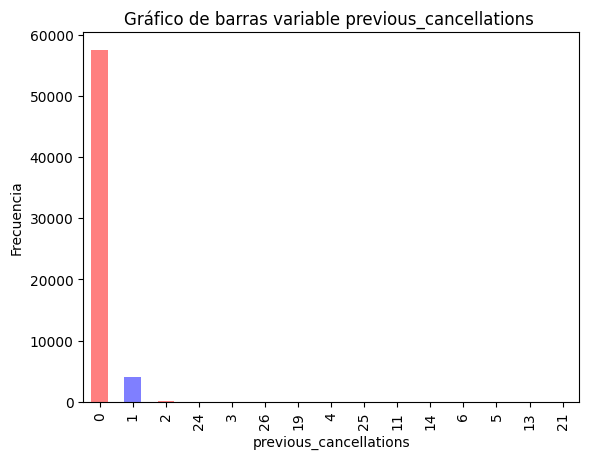

In [ ]:
#aca trate de hacer un pie chart con seaborn y me exploto la pc
grf=ds['previous_cancellations'].value_counts().plot.bar(alpha=0.5,color=colores, title="Gráfico de barras variable previous_cancellations ", xlabel="previous_cancellations",ylabel="Frecuencia") 

Variable: *previous_bookings_not_canceled*

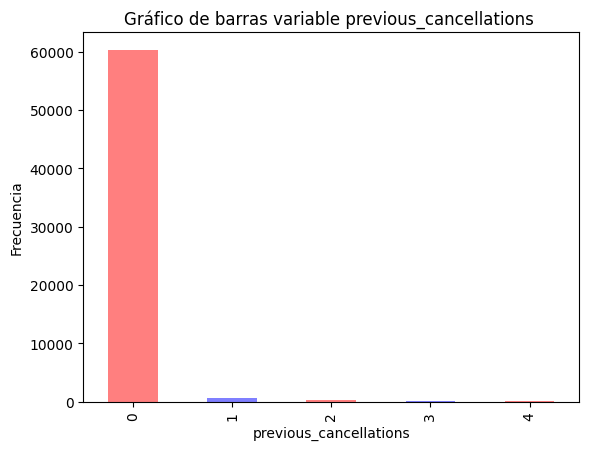

In [ ]:
#acoto a los valores mas representativos para darle mas claridad al grafico
rf=ds["previous_bookings_not_canceled"][ds['previous_bookings_not_canceled'] < 5].value_counts().plot.bar(alpha=0.5,color=colores, title="Gráfico de barras variable previous_cancellations ", xlabel="previous_cancellations",ylabel="Frecuencia") 

Variable: *adults*

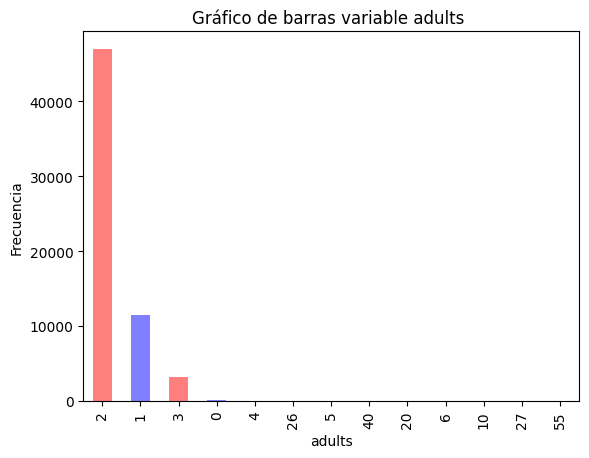

In [ ]:
f=ds["adults"].value_counts().plot.bar(alpha=0.5,color=colores, title="Gráfico de barras variable adults ", xlabel="adults",ylabel="Frecuencia") 

Variable: *customer_type*

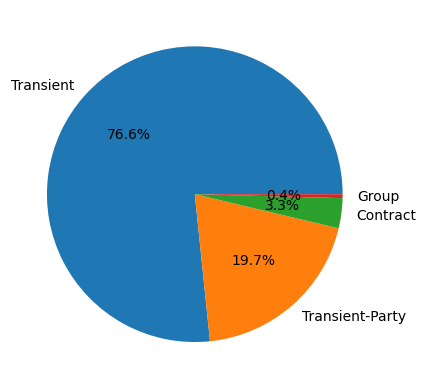

In [ ]:
sizes = [15, 30, 45, 10]
labels = ["Transient", "Transient-Party", "Contract", "Group"]
fig, ax = plt.subplots()
si = ax.pie(ds["customer_type"].value_counts(), labels=labels, autopct='%1.1f%%')

Variable: *country*

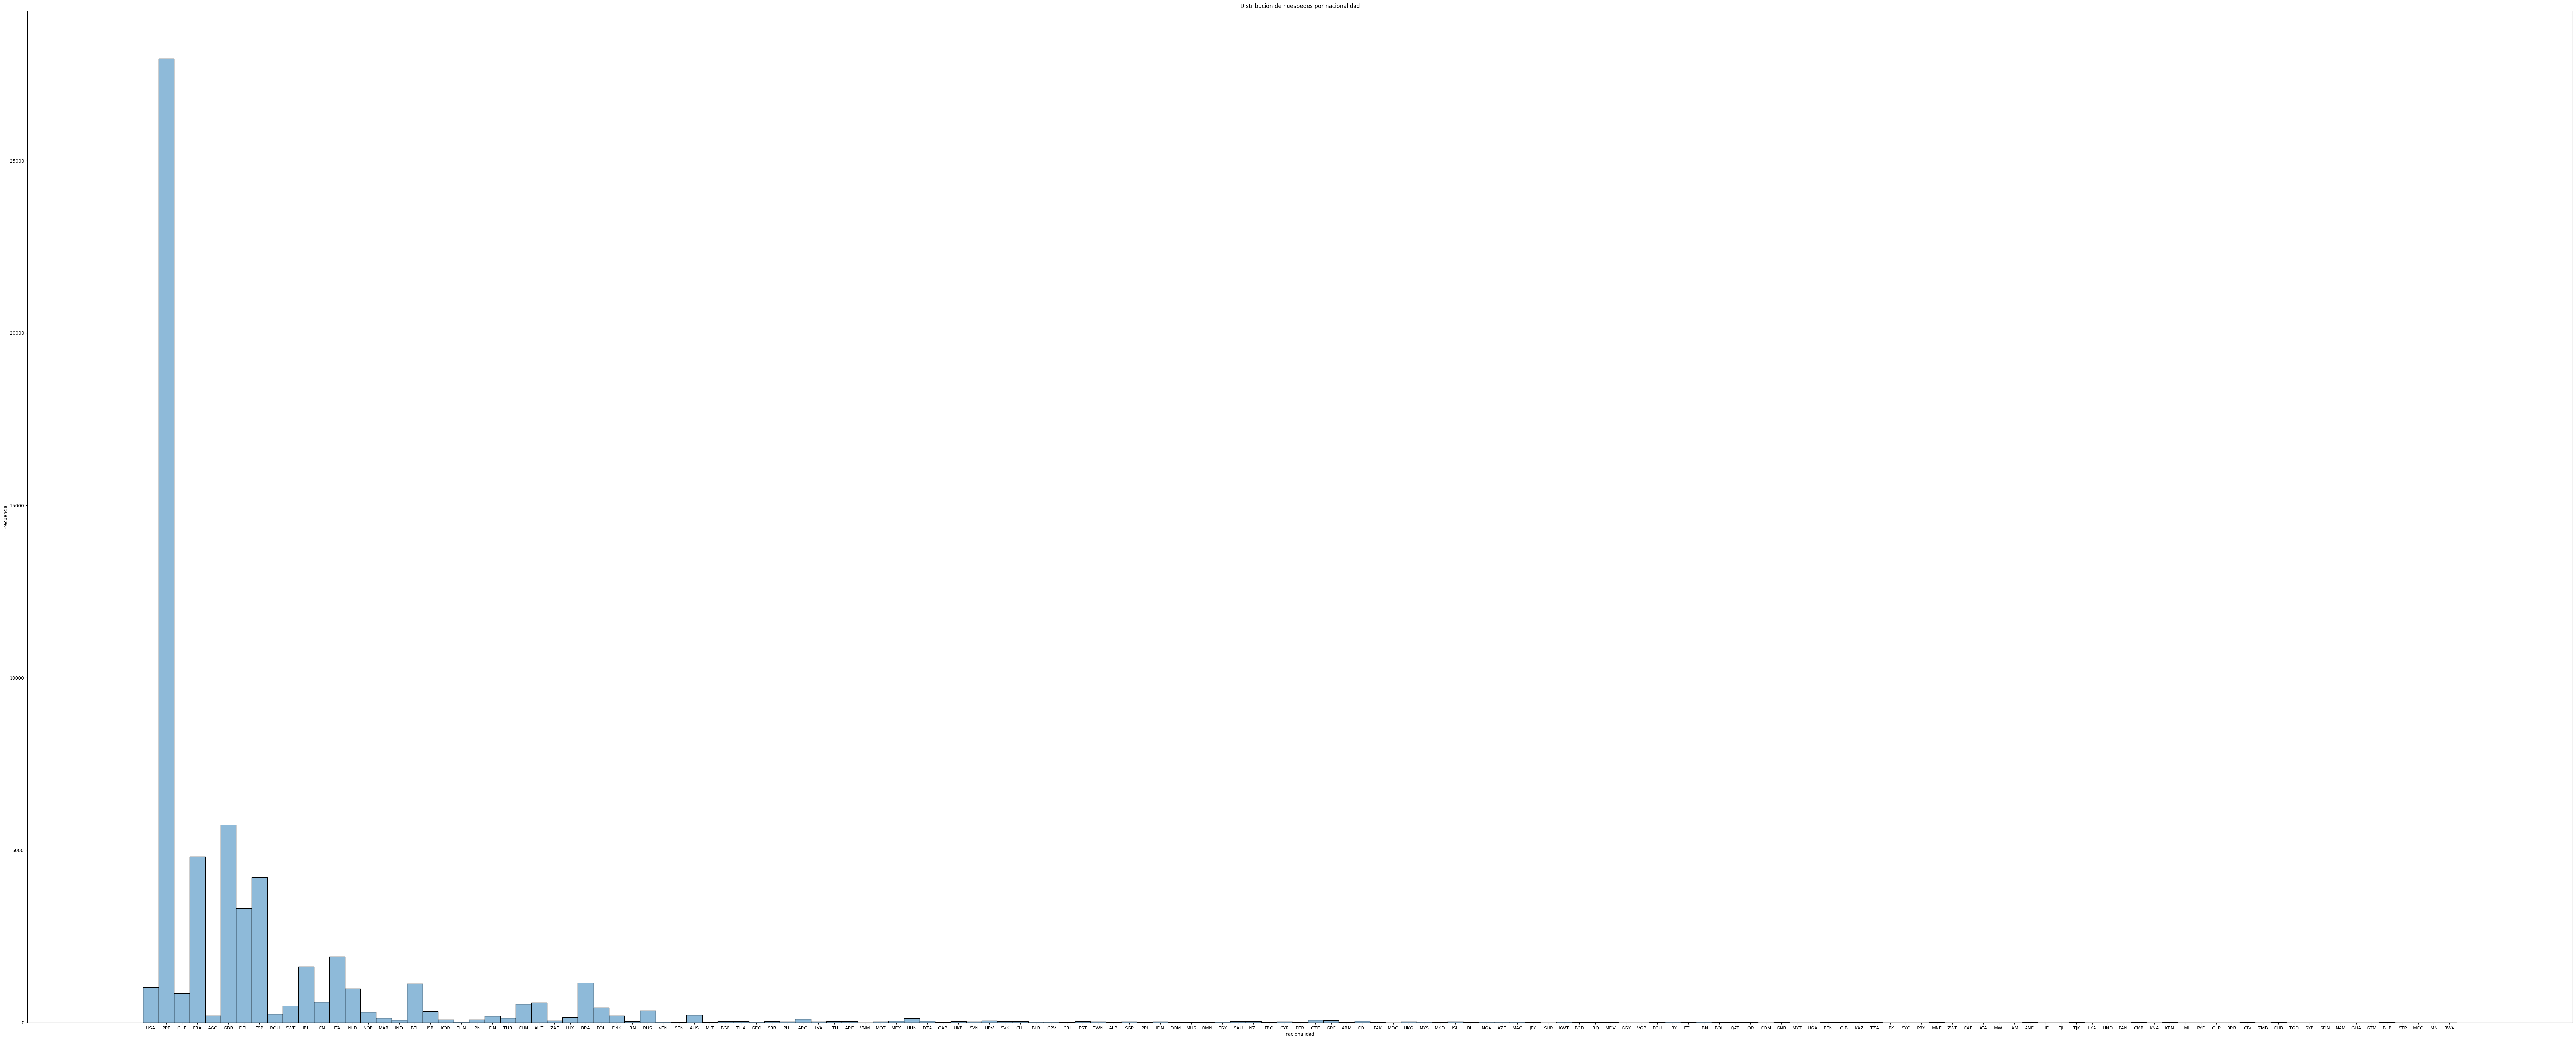

In [ ]:
plt.figure(figsize=(100, 40))
sns_hist=sns.histplot(data=ds['country'], alpha = 0.5).set(title="Distribución de huespedes por nacionalidad",xlabel="nacionalidad",ylabel="Frecuencia")

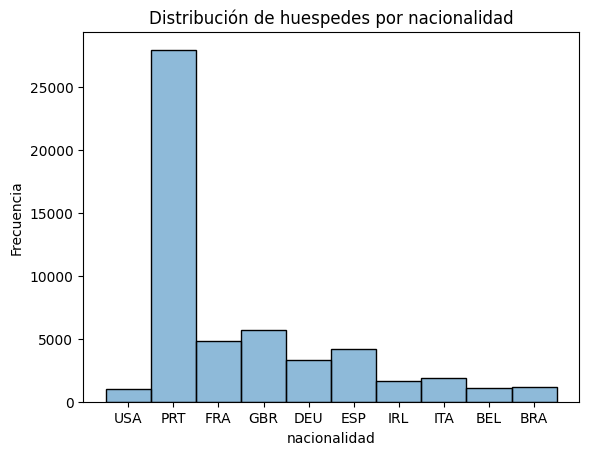

In [ ]:
# muestro los 10 paises mas significativos
sns_hist=sns.histplot(data=ds["country"][ds['country'].isin(["PRT",
"GBR",
"FRA",
"ESP",
"DEU",
"ITA",
"IRL",
"BRA",
"BEL",
"USA" ])], alpha = 0.5).set(title="Distribución de huespedes por nacionalidad",xlabel="nacionalidad",ylabel="Frecuencia")

Variables: *arrival*

Text(0.5, 1.0, 'Año de llegada')

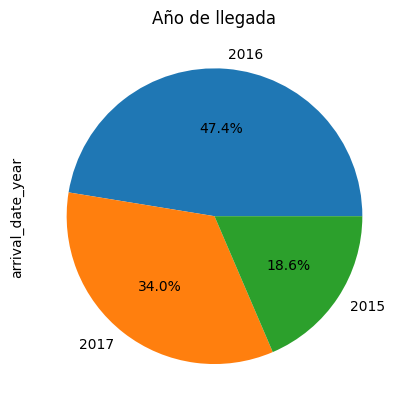

In [ ]:
serie_arrival_year = ds['arrival_date_year'].value_counts()
serie_arrival_year.plot.pie(autopct='%1.1f%%')
plt.title("Año de llegada")

Text(0.5, 1.0, 'Valores que toma arrival_date_month')

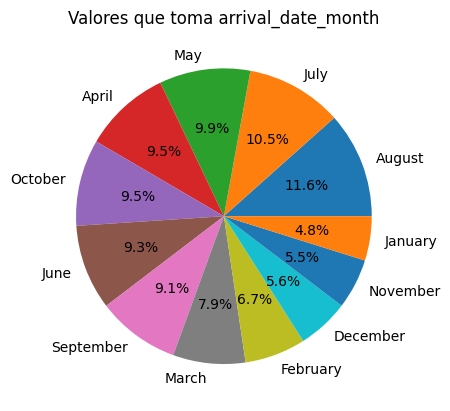

In [ ]:
serie_arrival_date_month = ds['arrival_date_month'].value_counts()
serie_arrival_date_month.plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.title('Valores que toma arrival_date_month')

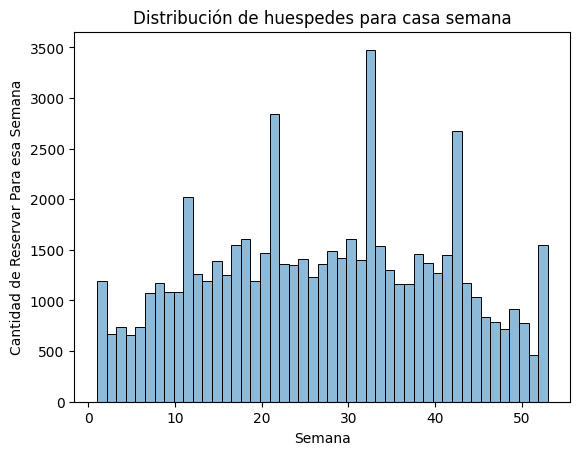

In [ ]:
serie_arrival_date_week_number = ds['arrival_date_week_number']

sns_hist=sns.histplot(data=serie_arrival_date_week_number, alpha = 0.5).set(title="Distribución de huespedes para casa semana",xlabel="Semana",ylabel="Cantidad de Reservar Para esa Semana")

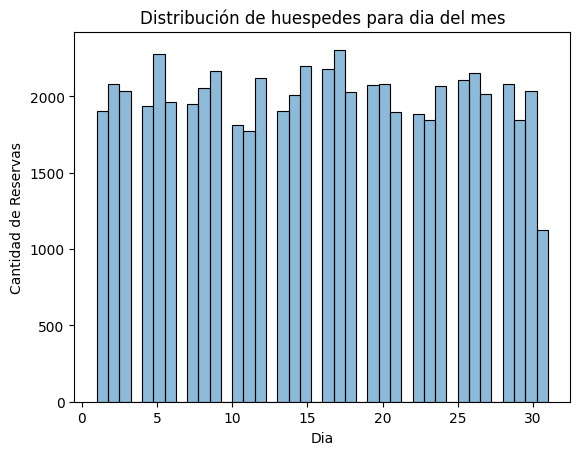

In [ ]:
serie_arrival_date_day_of_month = ds['arrival_date_day_of_month']
sns_hist=sns.histplot(data=serie_arrival_date_day_of_month, alpha = 0.5).set(title="Distribución de huespedes para dia del mes",xlabel="Dia",ylabel="Cantidad de Reservas")

0    27050
2    17248
1    15859
4      934
3      636
Name: stays_in_weekend_nights, dtype: int64


Text(0.5, 1.0, 'Valores que toma stays_in_weekend_nights')

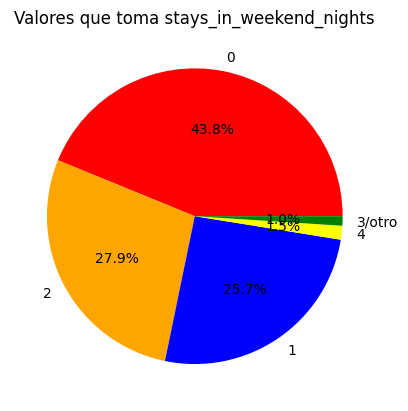

In [ ]:
serie_stays_in_weekend_nights = ds['stays_in_weekend_nights'].value_counts().drop([6,5,8,7,9,10,12,16])
print(serie_stays_in_weekend_nights)
labels = ['0', '2', '1', '4', '3/otro']
colors = ['red', 'orange', 'blue', 'yellow', 'green']
plt.pie(serie_stays_in_weekend_nights, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Valores que toma stays_in_weekend_nights')

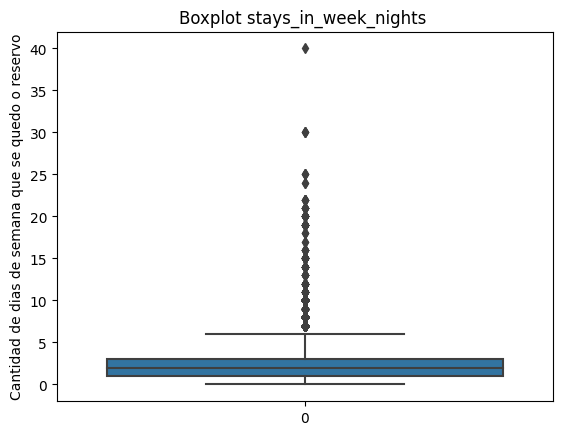

In [ ]:
serie_stays_in_week_nights = ds['stays_in_week_nights']
grf=sns.boxplot(data=serie_stays_in_week_nights).set(title="Boxplot stays_in_week_nights ",xlabel="",ylabel="Cantidad de dias de semana que se quedo o reservo")

Variable: *booking_changes*

Text(0.5, 1.0, 'Valores que toma booking_changes')

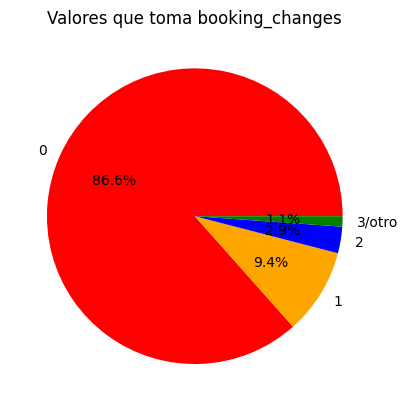

In [ ]:
serie_booking_changes = ds['booking_changes'].value_counts()
s_filtered = serie_booking_changes[serie_booking_changes > 400]
s_filtered[3] = s_filtered[3] + 294
labels = ['0', '1', '2', '3/otro']
colors = ['red', 'orange', 'blue', 'green']
plt.pie(s_filtered, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Valores que toma booking_changes')

Variable: *days_in_waiting_list*

0        0
1        0
2        0
3        0
4        0
        ..
61908    0
61909    0
61910    0
61911    0
61912    0
Name: days_in_waiting_list, Length: 61913, dtype: int64


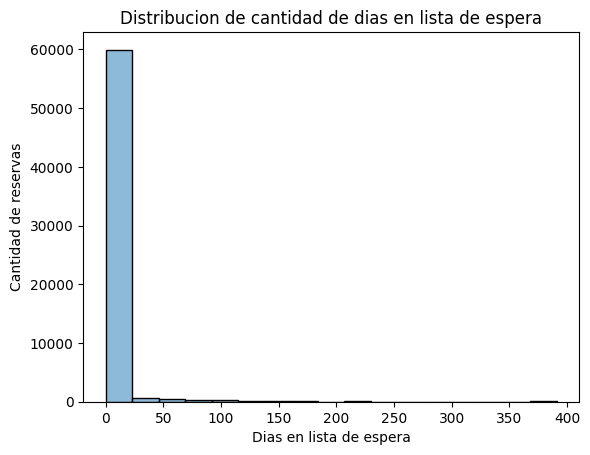

In [ ]:
serie_days_in_waiting_list = ds['days_in_waiting_list']
print(serie_days_in_waiting_list)
sns_hist=sns.histplot(data=serie_days_in_waiting_list, alpha = 0.5).set(title="Distribucion de cantidad de dias en lista de espera",xlabel="Dias en lista de espera",ylabel="Cantidad de reservas")

Variable: *total_of_special_requests*

Text(0.5, 1.0, 'Valores que toma total_of_special_requests')

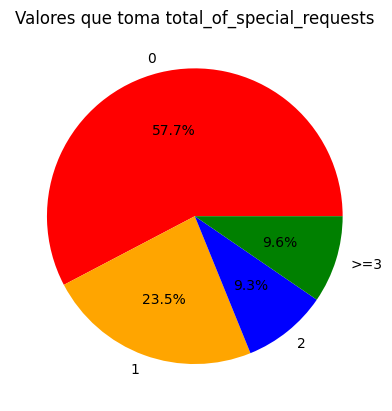

In [ ]:
serie_total_of_special_requests = ds['total_of_special_requests'].value_counts()
s_filtered = serie_total_of_special_requests[serie_total_of_special_requests > 200]
s_filtered[3] = s_filtered[2] + 170
labels = ['0', '1', '2', '>=3']
colors = ['red', 'orange', 'blue', 'green']
plt.pie(s_filtered, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Valores que toma total_of_special_requests')

#Correlaciones existentes entre las variables

HeatMap de todas las variables

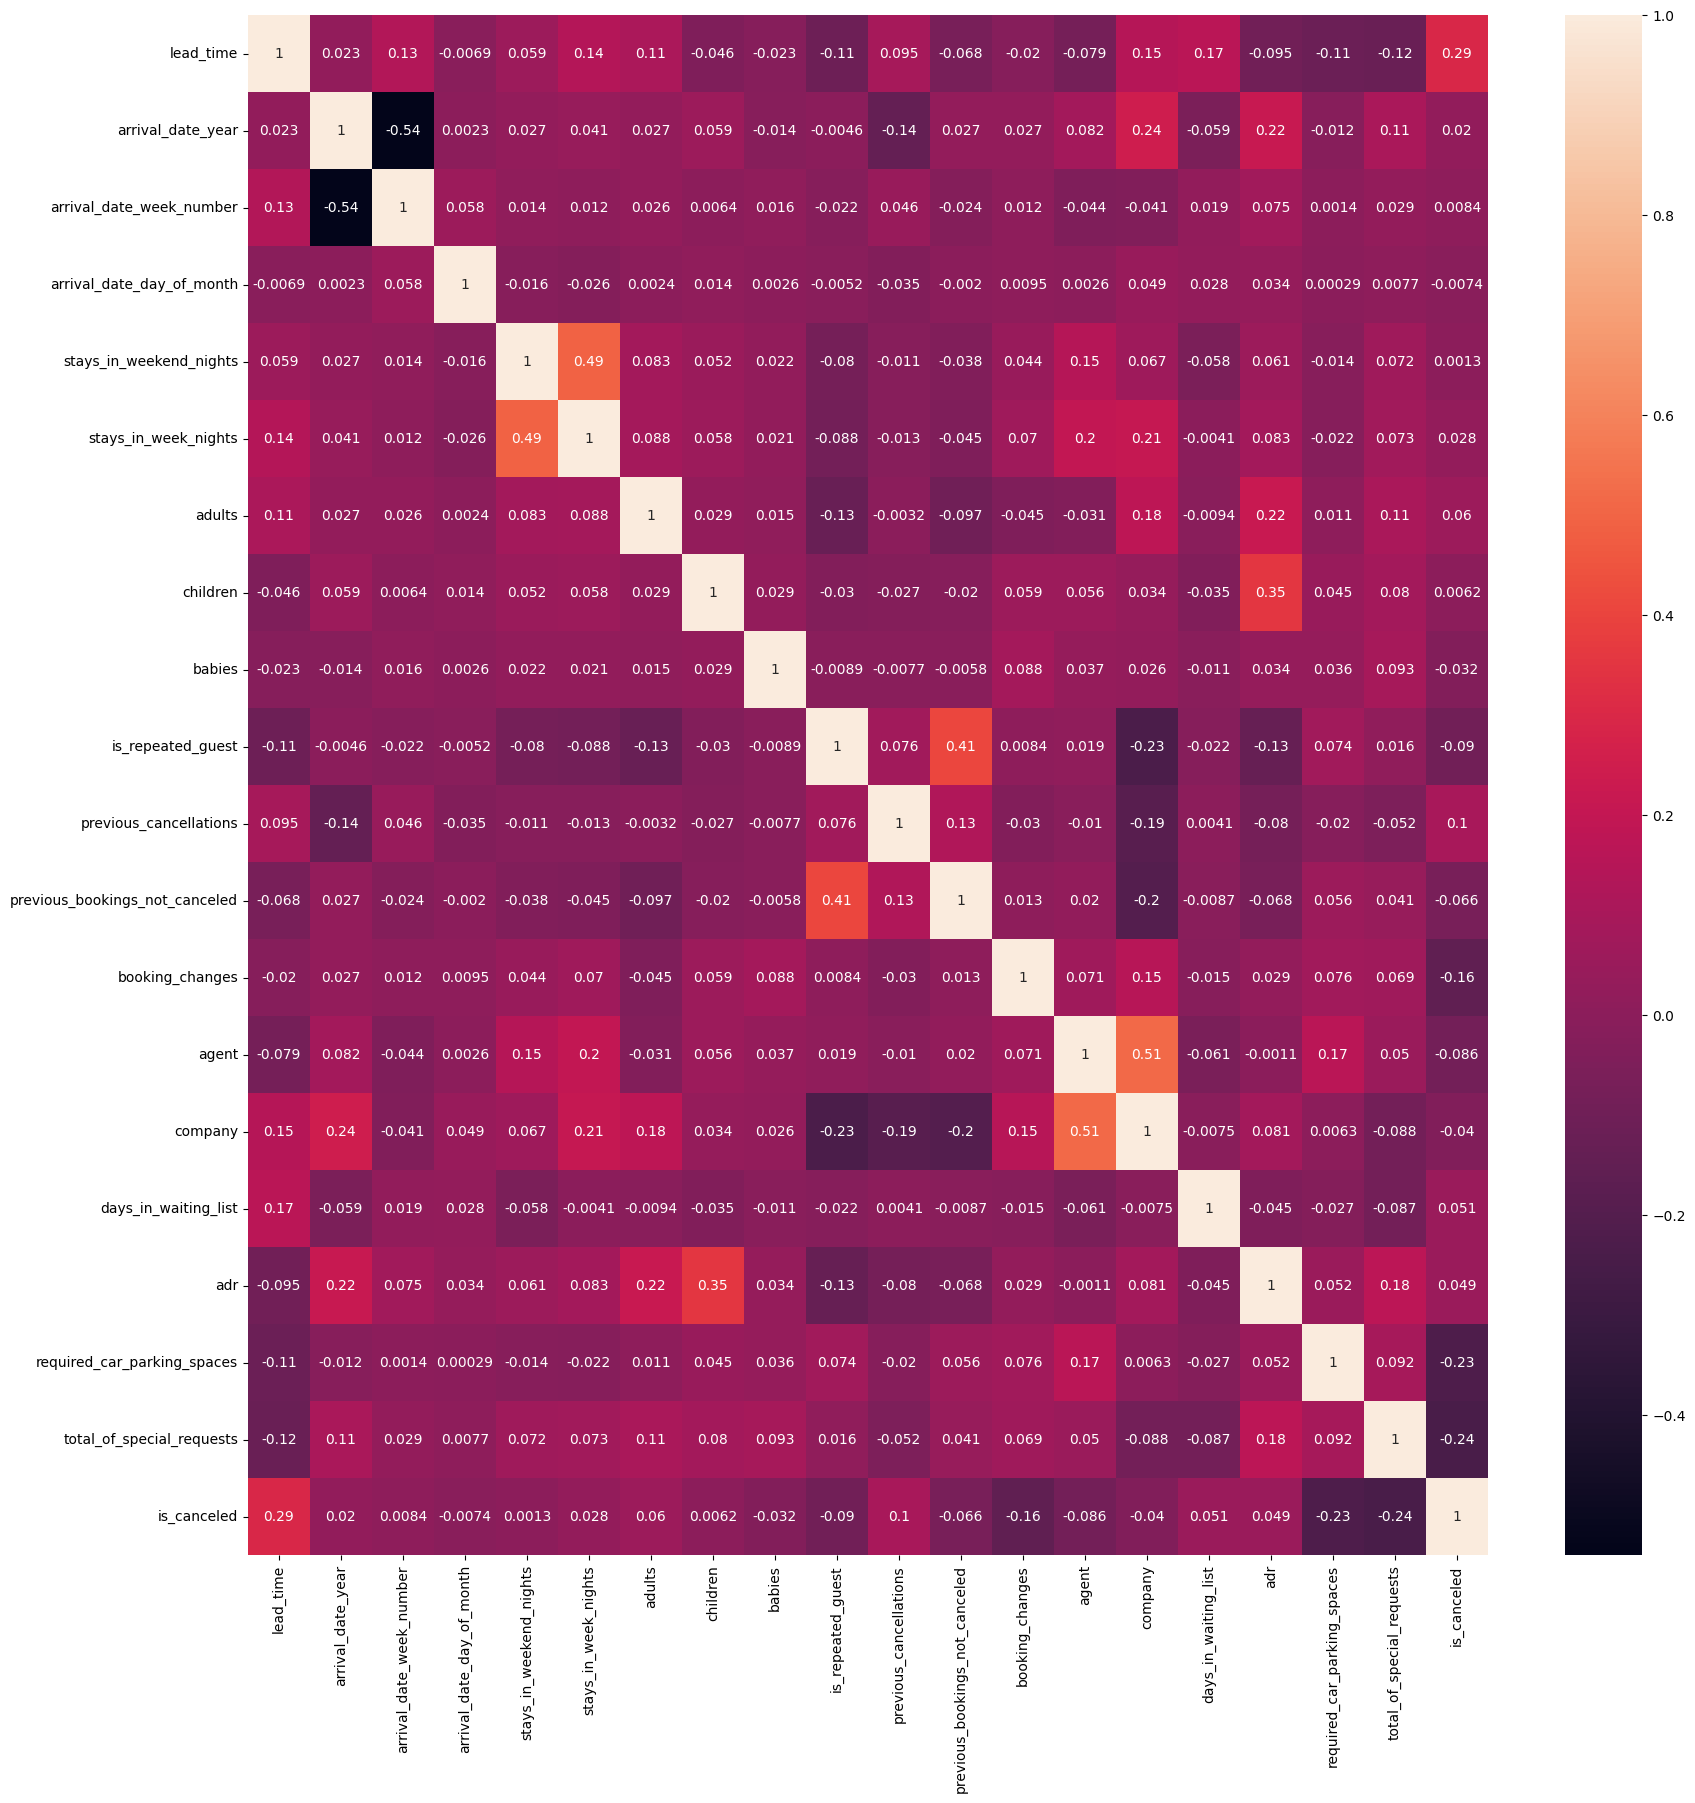

In [ ]:
matriz_corr = ds.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(matriz_corr, annot = True)
 
plt.show()

Variables mas fuertemente correlacionadas

In [ ]:
# variables mas fuertemente correlacionadas
max_corr = ds.corr().unstack().drop_duplicates().sort_values()
display(max_corr.head())
max_corr.tail(10)



arrival_date_year               arrival_date_week_number   -0.540542
total_of_special_requests       is_canceled                -0.244997
is_repeated_guest               company                    -0.233782
required_car_parking_spaces     is_canceled                -0.225915
previous_bookings_not_canceled  company                    -0.199952
dtype: float64

stays_in_week_nights     company                           0.211214
arrival_date_year        adr                               0.217409
adults                   adr                               0.221538
arrival_date_year        company                           0.243066
lead_time                is_canceled                       0.293816
children                 adr                               0.350482
is_repeated_guest        previous_bookings_not_canceled    0.406030
stays_in_weekend_nights  stays_in_week_nights              0.488710
agent                    company                           0.514969
lead_time                lead_time                         1.000000
dtype: float64

Era de esperarse que stays_in_weekend_nights-stays_in_week_nights esten correlacionadas ya que contienen mucha de la misma información.

Lo mismo aplica para arrival_date_year y arrival_date_week_number.

Por otra parte la correlación entre is_repeated_guest-previous_bookings_not_canceled y children-adr valen la pena investigar. 

<ipython-input-28-d2c3078f0f59>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  raf_relplot=sns.relplot(data=ds,x="agent", y="company",palette=["r", "g"]).set(title="agent vs company",xlabel='agent',ylabel='company')


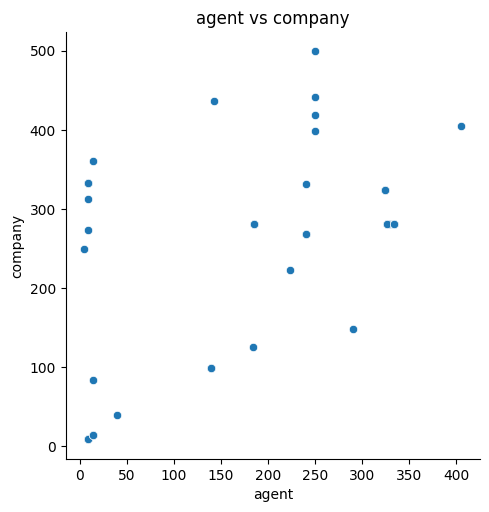

In [ ]:
raf_relplot=sns.relplot(data=ds,x="agent", y="company",palette=["r", "g"]).set(title="agent vs company",xlabel='agent',ylabel='company')

Diria que la correlacion no es muy significativa porque a company le faltan muchos datos

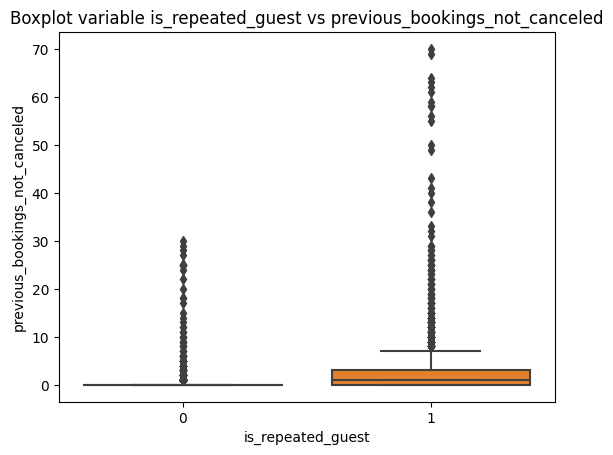

In [ ]:
grf=sns.boxplot(y="previous_bookings_not_canceled",x="is_repeated_guest" , data=ds).set(title="Boxplot variable is_repeated_guest vs previous_bookings_not_canceled",xlabel="is_repeated_guest",ylabel="previous_bookings_not_canceled")

Pareceria que hay una relacion tener mas de una reserva no cancelada y ser huesped repetido

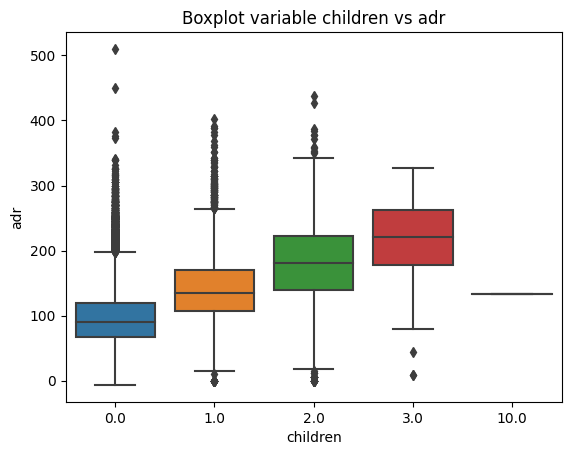

In [ ]:
grf=sns.boxplot(y="adr",x="children" , data=ds).set(title="Boxplot variable children vs adr",xlabel="children",ylabel="adr")

#Relación de las variables con el target

Pareceria que hay una relacion tener mas hijos y gastar mas en el hotel

In [ ]:
matriz_corr_target = ds.corrwith(ds["is_canceled"])
matriz_corr_target

lead_time                         0.292196
arrival_date_year                 0.022502
arrival_date_week_number          0.007750
arrival_date_day_of_month        -0.005914
stays_in_weekend_nights           0.000929
stays_in_week_nights              0.027833
adults                            0.064424
children                          0.006950
babies                           -0.033339
is_repeated_guest                -0.088956
previous_cancellations            0.173341
previous_bookings_not_canceled   -0.065837
booking_changes                  -0.158155
agent                            -0.087704
company                          -0.041613
days_in_waiting_list              0.051371
adr                               0.050166
required_car_parking_spaces      -0.228101
total_of_special_requests        -0.245063
is_canceled                       1.000000
dtype: float64

Se puede ver que lead_time y previous_cancellations tienen cierta correlación positiva con el target y que total_of_special_requests y total_of_special_requests tienen cierta correlación negativa

Para analziar variables cuantitativas hacemos graficos

['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'company', 'customer_type', 'id']
hotel


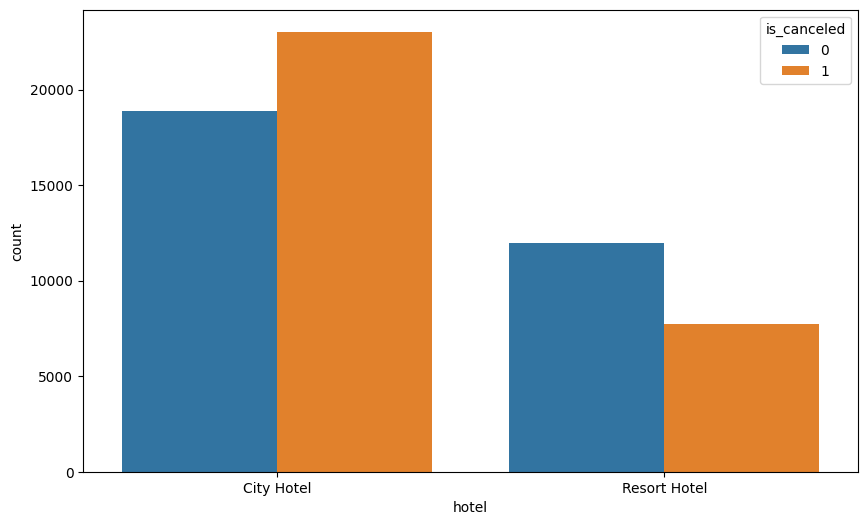

arrival_date_month


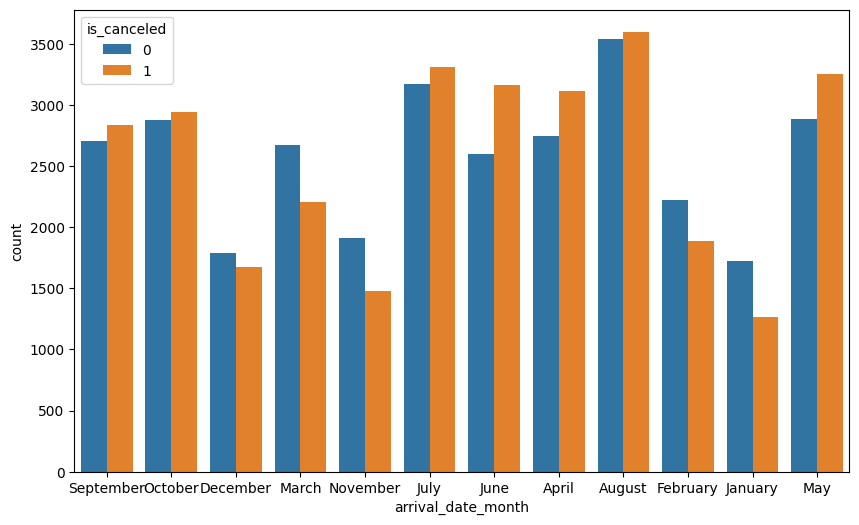

meal


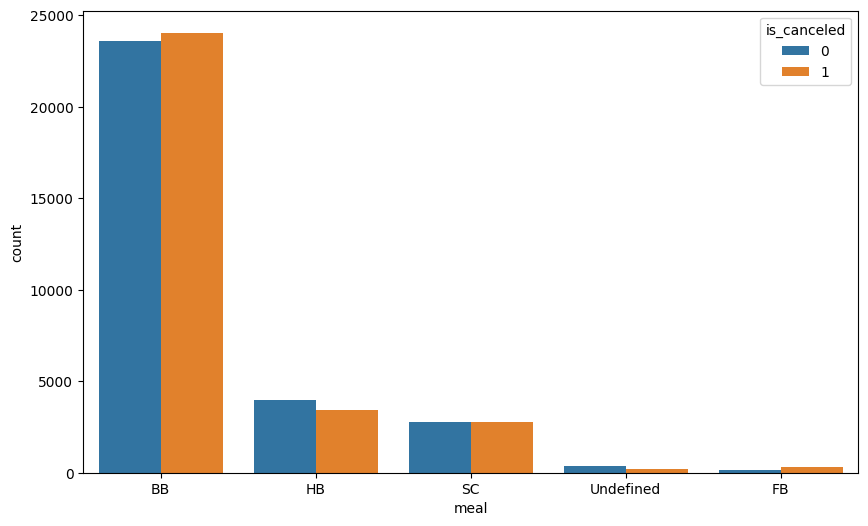

country


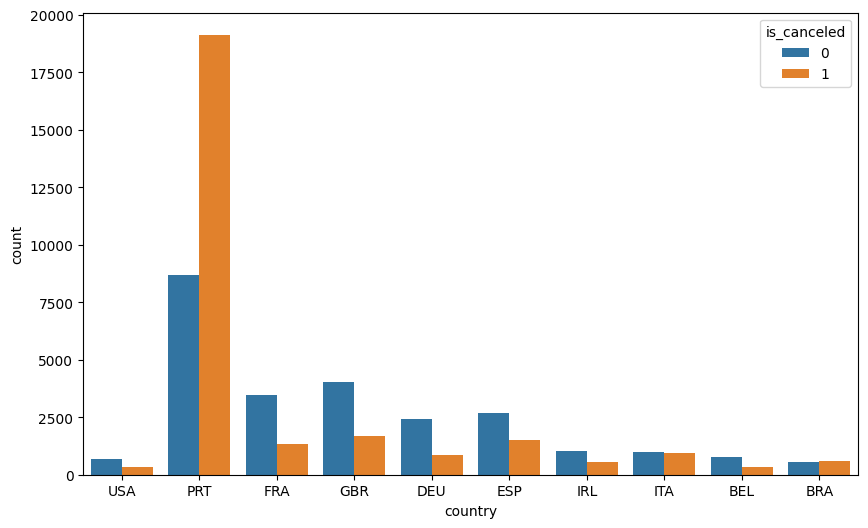

market_segment


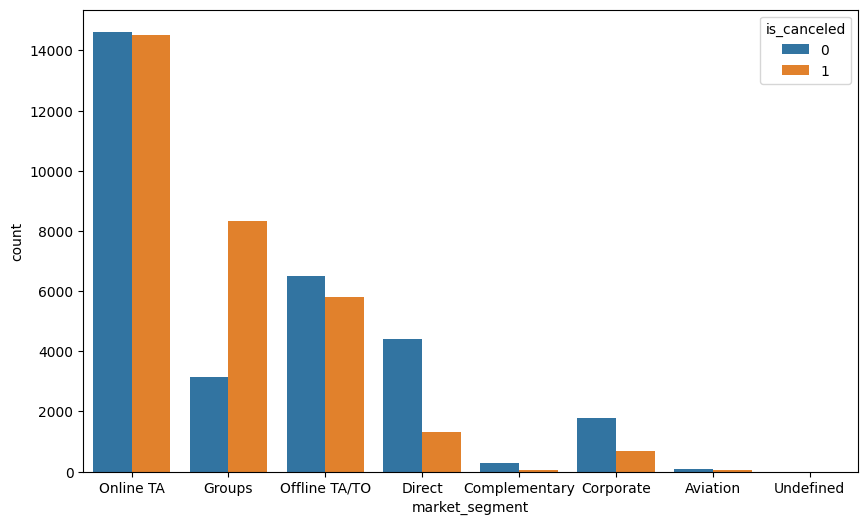

distribution_channel


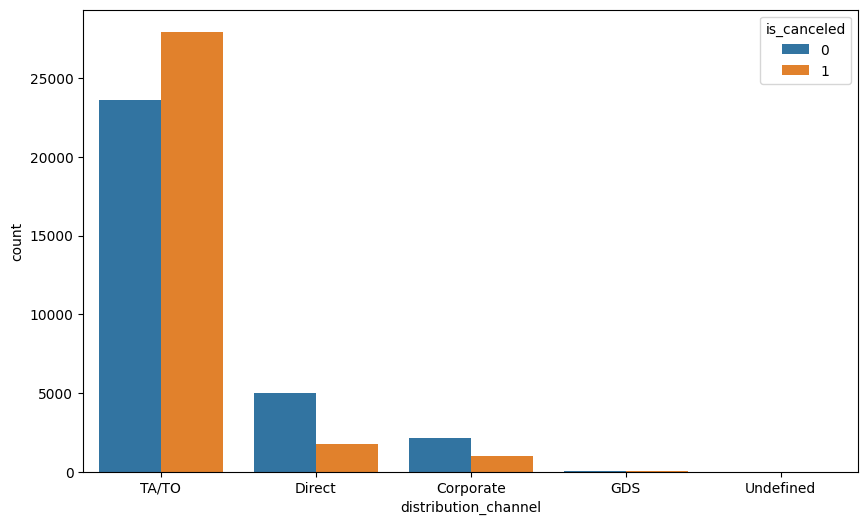

reserved_room_type


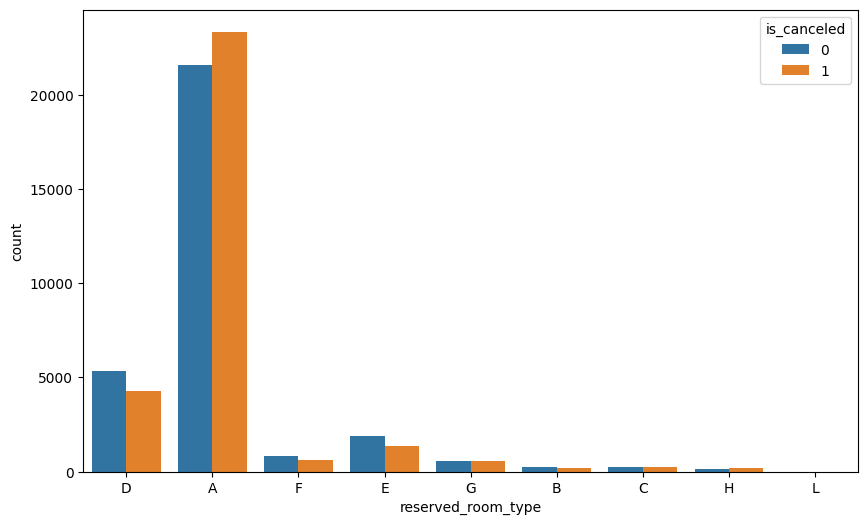

assigned_room_type


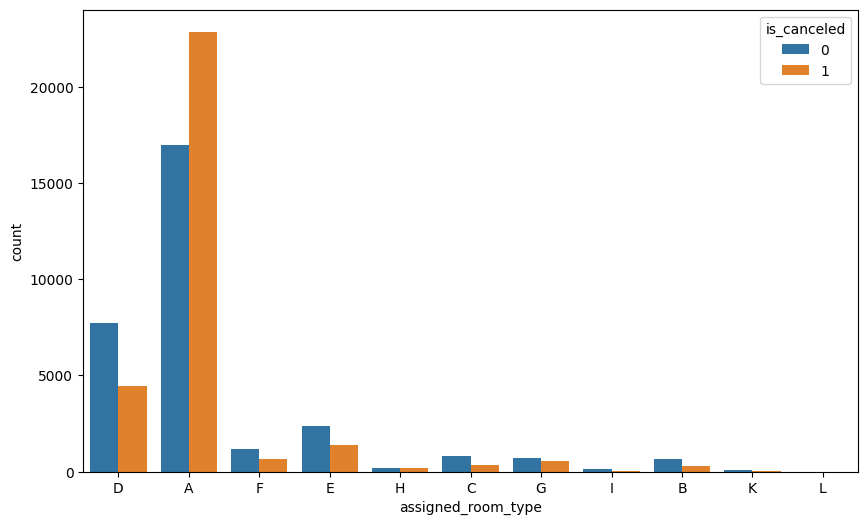

deposit_type


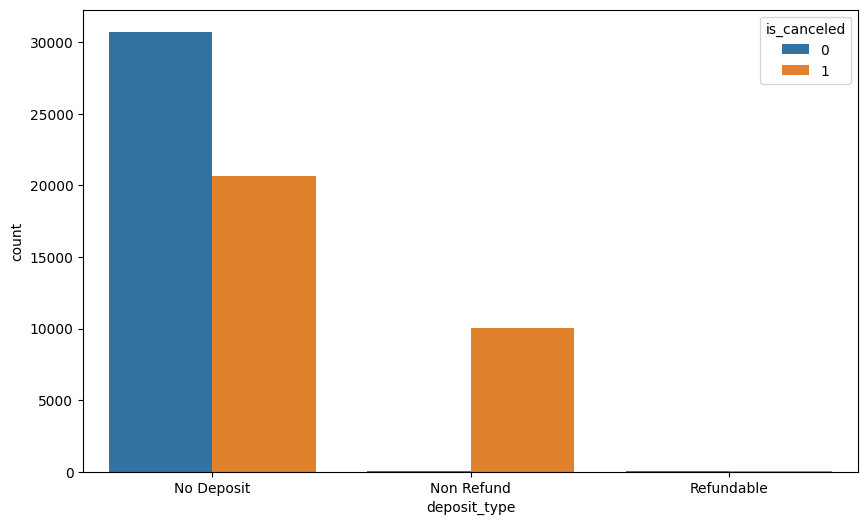

customer_type


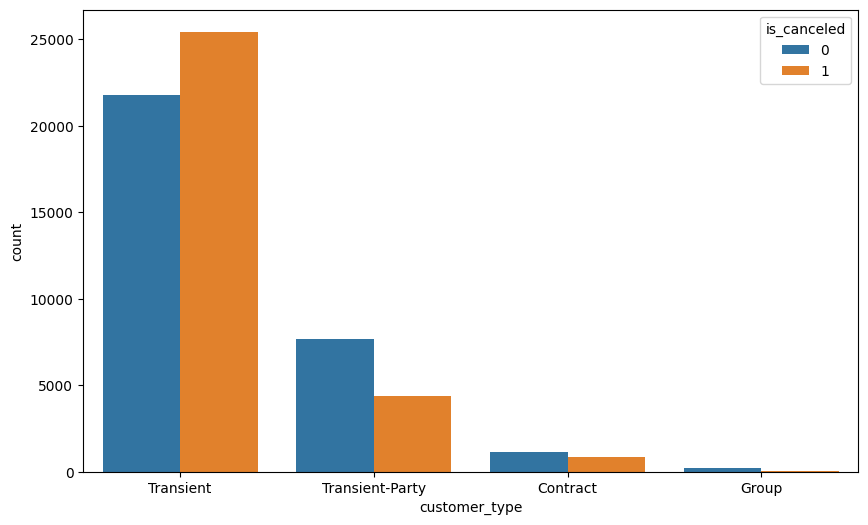

In [ ]:
def graf_corr_target(ds, variables):
  for var in variables:
    if var in ["id", "company","meal"]:
      continue
    print(var)
    datos = ds
    plt.figure(figsize=(10,6))
    if var == "country":
      datos = ds[ds["country"].isin(["PRT","GBR","FRA","ESP","DEU","ITA","IRL","BRA","BEL","USA" ])]
    sns.countplot(data=datos, x=var, hue="is_canceled")
    plt.show()
print(var_cual)
graf_corr_target(ds, var_cual)

De los graficos (asumiendo que las que muestran son verdaremente causales) algunas de la conclusiones que se pueden sacar son:
* Quienes se quedan en el City Hotel tienen mas chances de cancelar y los que se quedan en el Resort Hotel menos
* Huespedes proveniente de PRT (creo que es Portugal) tienen mas del doble de chances de de cancelar que de no hacerlo
*  Para market_segment: Groups muestra mas del doble de chances de cancelar y tanto Direct como Corporate mas del doble de no cancelar
* Para distribution_channel: Direct muestra mas del doble de chances de no cancelar
* Para assigned_room_type: A muestra considerablemente mayor chance de cancelar que de no hacerlo
* Para deposit_type: No Deposit muestra considerablemente mayor chance de no cancelar que de hacerlo y Non Refund es solo para cancelaciones

# Analisis de datos faltantes



In [ ]:
print(ds.isnull().sum())

hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             221
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              7890
company                           58761
days_in_waiting_list                  0


In [ ]:
ds.isin(['Undefined']).sum()

hotel                               0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                              591
country                             0
market_segment                      2
distribution_channel                4
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
company                             0
days_in_waiting_list                0
customer_type                       0
adr         

La varible **meal** contiene una caractegoria como valor 'Undefined' asi que no cuuenta como dato faltante

In [ ]:
ds[ds.duplicated() == True]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled


No hay filas duplicadas

Las variables que poseen datos faltantes son: 
 **children, country, agent, company**, **distribution_chanel** y **market_segment**

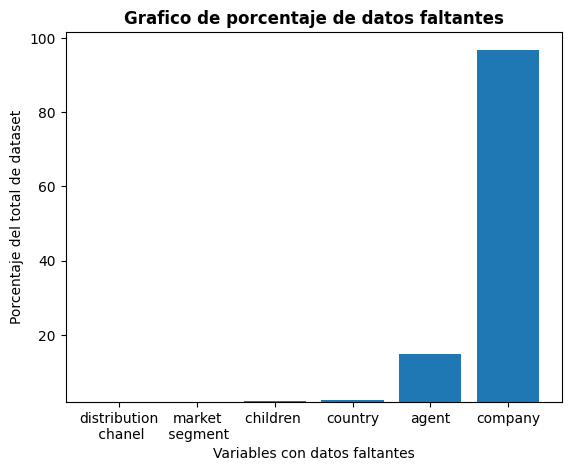

In [ ]:
filas_totales = ds.shape[0]

variables_no_asignadas = ['distribution\n chanel','market\n segment','children ','country','agent','company']
children_no_asignado = (ds[ds.children.isnull() == True].children.size/filas_totales)*100
country_no_asignado = (ds[ds.country.isnull() == True].country.size/filas_totales)*100
agent_no_asignado = (ds[ds.agent.isnull() == True].agent.size/filas_totales)*100
company_no_asignado = (ds[ds.company.isnull() == True].company.size/filas_totales)*100
markent_segment_no_valido = (ds[ds.market_segment.isnull() == True].company.size/filas_totales)*100
distribution_channel_no_valido = (ds[ds.distribution_channel.isnull() == True].company.size/filas_totales)*100

valores_no_asignados = [distribution_channel_no_valido, markent_segment_no_valido, children_no_asignado, 
                        country_no_asignado, agent_no_asignado, company_no_asignado]

plt.bar(variables_no_asignadas,height=valores_no_asignados,bottom=2)
plt.xlabel("Variables con datos faltantes", fontweight= 500)
plt.ylabel("Porcentaje del total de dataset")
plt.title("Grafico de porcentaje de datos faltantes", fontweight= 560)
plt.show()

Solo el 5% de datos de la variable company son los que no tienen nans y lo mejor seria eliminarla ya que la columna no tiene mucha relevancia para el uso de la prediccion

In [ ]:
ds_hotels.drop(columns= 'company', inplace = True)

Para el caso de **children**, **country**, **agent**, **market_segment** y **distribution_chanel** vamos a buscar el valor mas frecuente de la variable y la vamos a imputar

In [ ]:
ds.children.value_counts()/len(ds[ds.children.isnull() == False])*100

0.0     92.808800
1.0      3.968728
2.0      3.157861
3.0      0.062996
10.0     0.001615
Name: children, dtype: float64

In [ ]:
ds_hotels.children.replace([np.NaN],0, inplace= True)
ds_hotels.children.value_counts()/len(ds_hotels)*100

0.0     92.809265
1.0      3.968472
2.0      3.157657
3.0      0.062992
10.0     0.001615
Name: children, dtype: float64

In [ ]:
ds.country.value_counts()/len(ds[ds.country.isnull() == False])*100

PRT    45.305712
GBR     9.292939
FRA     7.795176
ESP     6.824224
DEU     5.368605
         ...    
HND     0.001621
FJI     0.001621
LIE     0.001621
ATA     0.001621
RWA     0.001621
Name: country, Length: 149, dtype: float64

In [ ]:
ds_hotels.country.replace([np.NaN],'PRT', inplace= True)
ds_hotels.country.value_counts()/len(ds_hotels)*100

PRT    45.500945
GBR     9.259768
FRA     7.767351
ESP     6.799864
DEU     5.349442
         ...    
HND     0.001615
FJI     0.001615
LIE     0.001615
ATA     0.001615
RWA     0.001615
Name: country, Length: 149, dtype: float64

In [ ]:
ds.agent.value_counts()/len(ds[ds.agent.isnull() == False])*100

9.0      31.475483
240.0    13.671955
1.0       8.189105
14.0      3.146808
6.0       3.033893
           ...    
420.0     0.001851
352.0     0.001851
450.0     0.001851
283.0     0.001851
25.0      0.001851
Name: agent, Length: 296, dtype: float64

In [ ]:
ds_hotels.agent.replace([np.NaN],9.0, inplace= True)
ds_hotels.agent.value_counts()/len(ds_hotels)*100

9.0      40.208034
240.0    11.929643
1.0       7.145511
14.0      2.745788
6.0       2.647263
           ...    
420.0     0.001615
352.0     0.001615
450.0     0.001615
283.0     0.001615
25.0      0.001615
Name: agent, Length: 296, dtype: float64

In [ ]:
ds[ds.distribution_channel != 'Undefined'].distribution_channel.value_counts()/len(ds)*100

TA/TO        83.744932
Direct       10.981539
Corporate     5.123318
GDS           0.143750
Name: distribution_channel, dtype: float64

In [ ]:
ds_hotels.distribution_channel.replace(['Undefined'],'TA/TO', inplace= True)
ds_hotels.distribution_channel.value_counts()/len(ds_hotels)*100

TA/TO        83.751393
Direct       10.981539
Corporate     5.123318
GDS           0.143750
Name: distribution_channel, dtype: float64

In [ ]:
ds[ds.market_segment != 'Undefined'].market_segment.value_counts()/len(ds)*100

Online TA        47.274401
Offline TA/TO    20.002261
Groups           18.647134
Direct            9.298532
Corporate         4.012081
Complementary     0.579846
Aviation          0.182514
Name: market_segment, dtype: float64

In [ ]:
ds_hotels.market_segment.replace(['Undefined'],'Online TA', inplace= True)
ds_hotels.market_segment.value_counts()/len(ds_hotels)*100

Online TA        47.277632
Offline TA/TO    20.002261
Groups           18.647134
Direct            9.298532
Corporate         4.012081
Complementary     0.579846
Aviation          0.182514
Name: market_segment, dtype: float64

In [ ]:
ds_hotels.isnull().sum()/filas_totales

hotel                             0.0
lead_time                         0.0
arrival_date_year                 0.0
arrival_date_month                0.0
arrival_date_week_number          0.0
arrival_date_day_of_month         0.0
stays_in_weekend_nights           0.0
stays_in_week_nights              0.0
adults                            0.0
children                          0.0
babies                            0.0
meal                              0.0
country                           0.0
market_segment                    0.0
distribution_channel              0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
reserved_room_type                0.0
assigned_room_type                0.0
booking_changes                   0.0
deposit_type                      0.0
agent                             0.0
days_in_waiting_list              0.0
customer_type                     0.0
adr                               0.0
required_car

In [ ]:
ds_hotels[ds_hotels.distribution_channel == 'Undefined'].shape[0]

0

In [ ]:
ds_hotels[ds_hotels.market_segment == 'Undefined'].shape[0]

0

Ya no hay NaNs

# Analisis valores atipicos

In [ ]:
ds_atipico = ds.copy()

In [ ]:
def val_atipicos(ds, columnas):
    var_cualitativas = []
    tiene_atipocos = []
    for col in columnas:
      try:
        media=np.mean(ds[col])
        std=np.std(ds[col])
        ds['z_' + col]=(ds[col] - media)/std
        print(col+ "\n")
        display(ds[ds['z_' + col]>3])
        display(ds[ds['z_' + col]<-3])
        if (len(ds[ds['z_' + col]>3]) + len(ds[ds['z_' + col]<-3])) != 0:
           tiene_atipocos.append(col)
      except:
        var_cualitativas.append(col)
    return var_cualitativas, tiene_atipocos
var_cualitativas, tiene_atipicos = val_atipicos(ds_atipico, ds.columns)



lead_time



,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_lead_time
15,City Hotel,465,2017,July,30,26,0,3,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,229.0,NaN,0,Transient-Party,112.67,0,0,d73d9a15-bcb1-441e-9571-56cbdde0e670,1,3.186066
51,City Hotel,489,2016,November,46,10,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1.0,NaN,0,Transient,62.80,0,0,264b4bdc-1f93-41dc-bad8-381405061cb1,1,3.402834
95,City Hotel,454,2016,October,41,6,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1.0,NaN,0,Transient,62.00,0,0,11de0e85-b5c6-4876-96b7-37c65f479ec5,1,3.086713
426,City Hotel,521,2017,August,35,29,0,1,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,Non Refund,229.0,NaN,0,Transient,90.00,0,0,a70dfbf8-90d6-469e-a3d4-b21d5c33a6de,1,3.691859
576,City Hotel,626,2016,November,46,7,1,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1.0,NaN,0,Transient,62.80,0,0,69a7777e-6b6c-4e2c-a528-1286d6d647c3,1,4.640223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61579,City Hotel,517,2016,December,50,8,0,1,1,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1.0,NaN,0,Transient,51.40,0,0,cb04e323-6049-4445-8f8e-6d835b3a87cb,1,3.655731
61695,Resort Hotel,468,2016,May,20,12,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,249.0,NaN,0,Transient-Party,67.00,0,0,609aea5c-6d1e-47bb-becd-73de0c8d8278,1,3.213162
61761,City Hotel,496,2016,November,47,17,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1.0,NaN,0,Transient,62.80,0,0,159515de-2c06-41b2-8364-f34ddee5e1c6,1,3.466059
61783,City Hotel,454,2016,October,41,6,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1.0,NaN,0,Transient,62.00,0,0,5e1faaa8-cf26-4e74-bc1f-0fbcbfe65c01,1,3.086713


,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_lead_time


arrival_date_year



,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_lead_time,z_arrival_date_year


,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_lead_time,z_arrival_date_year


arrival_date_week_number



,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_lead_time,z_arrival_date_year,z_arrival_date_week_number


,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_lead_time,z_arrival_date_year,z_arrival_date_week_number


arrival_date_day_of_month



,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_lead_time,z_arrival_date_year,z_arrival_date_week_number,z_arrival_date_day_of_month


,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_lead_time,z_arrival_date_year,z_arrival_date_week_number,z_arrival_date_day_of_month


stays_in_weekend_nights



,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_lead_time,z_arrival_date_year,z_arrival_date_week_number,z_arrival_date_day_of_month,z_stays_in_weekend_nights
6,Resort Hotel,112,2015,November,46,12,4,9,2,0.0,0,HB,FRA,Offline TA/TO,TA/TO,0,0,0,D,D,1,No Deposit,314.0,NaN,0,Contract,66.42,0,1,c7e59753-c8a7-42eb-977b-f0ffaf1716eb,0,-0.002242,-1.630120,1.388589,-0.430430,3.097258
94,City Hotel,191,2017,June,24,17,4,8,2,0.0,0,BB,MAR,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,130.50,0,1,fb3af24b-c5a4-4830-afb4-fa01a2627873,1,0.711289,1.193211,-0.237920,0.138048,3.097258
113,Resort Hotel,146,2016,September,40,25,4,6,2,0.0,0,BB,IRL,Online TA,TA/TO,0,0,0,A,D,1,No Deposit,240.0,NaN,0,Transient,96.80,0,2,e0326b68-a222-4a83-816d-39116c1682a5,0,0.304847,-0.218454,0.944996,1.047612,3.097258
140,Resort Hotel,166,2017,July,29,16,4,6,2,0.0,0,BB,IRL,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,162.00,0,2,9429f06e-52f2-4d64-b5f5-cb66655c3b2b,0,0.485488,1.193211,0.131741,0.024352,3.097258
214,Resort Hotel,114,2016,May,20,12,4,10,2,0.0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,243.0,NaN,0,Contract,38.83,0,0,c52f0858-c532-4f9a-a574-5a831790dbab,0,0.015822,-0.218454,-0.533649,-0.430430,3.097258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61691,City Hotel,81,2015,August,32,3,5,12,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,76.50,0,1,c0cfb016-2568-408a-9662-9be32c236174,1,-0.282235,-1.630120,0.353538,-1.453690,4.104213
61705,Resort Hotel,301,2016,October,41,6,4,10,1,0.0,0,HB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,2.0,NaN,0,Contract,31.45,0,1,10cd0209-66ba-400b-bb22-826ad9ab72c9,0,1.704812,-0.218454,1.018928,-1.112604,3.097258
61747,Resort Hotel,321,2017,March,10,8,4,10,2,0.0,0,HB,NLD,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,66.60,0,1,4df87107-4266-4829-ab48-4ad6b2c23db4,1,1.885453,1.193211,-1.272971,-0.885212,3.097258
61840,Resort Hotel,31,2015,November,45,2,5,11,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,281.0,NaN,0,Transient-Party,40.00,0,0,32eeaf87-a22e-45fa-a019-6e98c3dea3b1,1,-0.733836,-1.630120,1.314657,-1.567386,4.104213


,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_lead_time,z_arrival_date_year,z_arrival_date_week_number,z_arrival_date_day_of_month,z_stays_in_weekend_nights


stays_in_week_nights



,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_lead_time,z_arrival_date_year,z_arrival_date_week_number,z_arrival_date_day_of_month,z_stays_in_weekend_nights,z_stays_in_week_nights
6,Resort Hotel,112,2015,November,46,12,4,9,2,0.0,0,HB,FRA,Offline TA/TO,TA/TO,0,0,0,D,D,1,No Deposit,314.0,NaN,0,Contract,66.42,0,1,c7e59753-c8a7-42eb-977b-f0ffaf1716eb,0,-0.002242,-1.630120,1.388589,-0.430430,3.097258,3.443105
214,Resort Hotel,114,2016,May,20,12,4,10,2,0.0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,243.0,NaN,0,Contract,38.83,0,0,c52f0858-c532-4f9a-a574-5a831790dbab,0,0.015822,-0.218454,-0.533649,-0.430430,3.097258,3.973634
287,Resort Hotel,24,2015,November,45,3,3,10,2,0.0,0,BB,ITA,Corporate,Corporate,0,0,0,A,A,1,No Deposit,326.0,281.0,0,Transient,48.00,0,0,d45e56a8-096a-43b7-b0c7-78c8bfeb0bd2,0,-0.797060,-1.630120,1.314657,-1.453690,2.090303,3.973634
325,Resort Hotel,171,2016,April,18,30,4,10,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,NaN,0,Transient,65.70,0,2,fab94a60-1bbf-4f3b-b2fc-eaca541b8935,1,0.530648,-0.218454,-0.681513,1.616090,3.097258,3.973634
454,Resort Hotel,181,2017,March,9,1,6,19,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,440.0,NaN,0,Transient-Party,58.60,0,0,d24d57c2-23a1-4a34-b634-451e7db42031,1,0.620969,1.193211,-1.346903,-1.681081,5.111168,8.748396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61691,City Hotel,81,2015,August,32,3,5,12,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,76.50,0,1,c0cfb016-2568-408a-9662-9be32c236174,1,-0.282235,-1.630120,0.353538,-1.453690,4.104213,5.034692
61705,Resort Hotel,301,2016,October,41,6,4,10,1,0.0,0,HB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,2.0,NaN,0,Contract,31.45,0,1,10cd0209-66ba-400b-bb22-826ad9ab72c9,0,1.704812,-0.218454,1.018928,-1.112604,3.097258,3.973634
61747,Resort Hotel,321,2017,March,10,8,4,10,2,0.0,0,HB,NLD,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,66.60,0,1,4df87107-4266-4829-ab48-4ad6b2c23db4,1,1.885453,1.193211,-1.272971,-0.885212,3.097258,3.973634
61840,Resort Hotel,31,2015,November,45,2,5,11,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,281.0,NaN,0,Transient-Party,40.00,0,0,32eeaf87-a22e-45fa-a019-6e98c3dea3b1,1,-0.733836,-1.630120,1.314657,-1.567386,4.104213,4.504163


,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_lead_time,z_arrival_date_year,z_arrival_date_week_number,z_arrival_date_day_of_month,z_stays_in_weekend_nights,z_stays_in_week_nights


adults



,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_lead_time,z_arrival_date_year,z_arrival_date_week_number,z_arrival_date_day_of_month,z_stays_in_weekend_nights,z_stays_in_week_nights,z_adults
2051,Resort Hotel,19,2017,June,24,12,1,4,4,0.0,0,BB,PRT,Direct,Direct,0,0,0,H,H,0,No Deposit,250.0,NaN,0,Transient,260.00,0,0,ca064aea-95d6-4f0e-a8f3-788c0876935d,1,-0.842221,1.193211,-0.237920,-0.430430,0.076392,0.790459,3.628158
2291,City Hotel,109,2016,December,50,8,0,3,4,0.0,0,BB,ARG,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,7.0,NaN,0,Transient,182.18,0,1,06a8cadf-ec95-4070-9baa-19233e04fe07,0,-0.029338,-0.218454,1.684318,-0.885212,-0.930563,0.259930,3.628158
3962,Resort Hotel,328,2015,October,41,6,2,5,5,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Group,0.00,0,0,54e377ff-6236-44f0-81e7-ab8750d6998a,1,1.948677,-1.630120,1.018928,-1.112604,1.083347,1.320989,5.325774
4064,Resort Hotel,304,2015,September,36,3,0,3,40,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Group,0.00,0,0,ebb06f2f-1c79-490c-ae9f-8f7ba838d328,1,1.731908,-1.630120,0.649267,-1.453690,-0.930563,0.259930,64.742311
4730,Resort Hotel,27,2015,August,36,31,1,3,4,0.0,0,HB,PRT,Direct,Direct,0,0,0,H,H,0,No Deposit,250.0,NaN,0,Transient,256.50,0,0,b13d5d16-4b7a-4b68-937f-dca166a78864,0,-0.769964,-1.630120,0.649267,1.729786,0.076392,0.259930,3.628158
11551,Resort Hotel,72,2016,April,14,1,2,5,4,1.0,0,BB,GBR,Direct,Direct,0,0,0,H,H,0,No Deposit,250.0,NaN,0,Transient,134.06,0,0,492c83e9-4bc9-42b1-8bfa-c9bef3997225,0,-0.363523,-0.218454,-0.977242,-1.681081,1.083347,1.320989,3.628158
11830,Resort Hotel,334,2015,October,42,12,2,5,20,0.0,0,BB,PRT,Direct,Direct,0,0,0,D,D,0,No Deposit,NaN,NaN,0,Group,0.00,0,0,b169d836-a93c-43a3-8bb4-9ec2afa66483,1,2.002869,-1.630120,1.092860,-0.430430,1.083347,1.320989,30.790004
12873,City Hotel,21,2016,July,30,17,2,1,4,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,8.0,NaN,0,Transient,299.33,0,0,e3c99ecb-c144-4c4a-960c-42c104b9dabb,1,-0.824157,-0.218454,0.205674,0.138048,1.083347,-0.801128,3.628158
13101,Resort Hotel,328,2015,October,41,6,2,5,6,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,NaN,NaN,0,Group,0.00,0,0,653ecbda-b99c-4aaf-b118-3c1877b57abb,1,1.948677,-1.630120,1.018928,-1.112604,1.083347,1.320989,7.023389
17204,City Hotel,75,2017,March,9,3,2,3,4,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,7.0,NaN,0,Transient,202.51,0,0,0790d547-0b99-418a-8e2f-0e4286e4db45,1,-0.336427,1.193211,-1.346903,-1.453690,1.083347,0.259930,3.628158


,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_lead_time,z_arrival_date_year,z_arrival_date_week_number,z_arrival_date_day_of_month,z_stays_in_weekend_nights,z_stays_in_week_nights,z_adults
96,City Hotel,23,2016,May,21,21,2,4,0,2.0,0,BB,IND,Online TA,TA/TO,0,0,0,B,B,0,No Deposit,9.0,NaN,0,Transient,128.49,0,0,dcaf076d-bd38-47dd-8d9d-16be09cd5b08,1,-0.806092,-0.218454,-0.459717,0.592830,1.083347,0.790459,-3.162303
212,City Hotel,315,2017,July,27,7,0,1,0,2.0,0,BB,USA,Online TA,TA/TO,0,0,0,B,B,0,No Deposit,9.0,NaN,0,Transient,91.85,0,2,55c9b5f9-b5d0-49a2-9348-c6476a0bd772,1,1.831261,1.193211,-0.016123,-0.998908,-0.930563,-0.801128,-3.162303
270,City Hotel,4,2017,February,8,21,0,3,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient-Party,0.00,0,0,6a48e05e-c36a-41d0-b7e0-5f8b92dab109,1,-0.977701,1.193211,-1.420835,0.592830,-0.930563,0.259930,-3.162303
326,City Hotel,53,2016,November,49,29,0,4,0,2.0,0,BB,ROU,Online TA,TA/TO,0,0,0,B,A,0,No Deposit,9.0,NaN,0,Transient,77.86,0,2,74fe3153-e2ae-4650-a375-05fc52881a56,0,-0.535132,-0.218454,1.610386,1.502395,-0.930563,0.790459,-3.162303
464,City Hotel,64,2015,October,42,16,2,3,0,0.0,0,SC,FRA,Offline TA/TO,TA/TO,0,0,0,A,K,2,No Deposit,50.0,NaN,0,Transient-Party,0.00,0,0,cfe370c2-298a-4de8-82fd-f8d418febd7f,0,-0.435779,-1.630120,1.092860,0.024352,1.083347,0.259930,-3.162303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59982,City Hotel,44,2016,February,7,8,1,3,0,2.0,0,BB,ITA,Online TA,TA/TO,0,0,0,B,B,0,No Deposit,9.0,NaN,0,Transient-Party,66.50,0,1,8b700cc2-903e-4400-9c68-aba04d69de38,1,-0.616420,-0.218454,-1.494768,-0.885212,0.076392,0.259930,-3.162303
60837,City Hotel,33,2017,May,19,9,0,1,0,0.0,0,SC,PRT,Offline TA/TO,TA/TO,0,0,0,E,G,3,No Deposit,87.0,NaN,0,Transient,200.00,0,0,070652d9-948b-47a3-bb96-113627bb5558,0,-0.715772,1.193211,-0.607581,-0.771517,-0.930563,-0.801128,-3.162303
60994,City Hotel,11,2016,August,34,19,0,1,0,2.0,0,BB,BEL,Online TA,TA/TO,0,0,0,B,B,0,No Deposit,9.0,NaN,0,Transient,127.60,0,1,17552f62-53e5-4bdf-877d-c2b9769ec27a,0,-0.914477,-0.218454,0.501402,0.365439,-0.930563,-0.801128,-3.162303
61003,City Hotel,57,2016,November,46,9,0,2,0,0.0,0,SC,SGP,Direct,Direct,0,0,0,A,K,0,No Deposit,14.0,NaN,0,Transient,165.38,0,2,c6b4f9bb-b1f7-4765-a4af-5846748c13f4,0,-0.499003,-0.218454,1.388589,-0.771517,-0.930563,-0.270599,-3.162303


children



,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_lead_time,z_arrival_date_year,z_arrival_date_week_number,z_arrival_date_day_of_month,z_stays_in_weekend_nights,z_stays_in_week_nights,z_adults,z_children
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,0,BB,CHE,Online TA,TA/TO,0,0,0,F,F,0,No Deposit,9.0,NaN,0,Transient,229.00,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0,-0.788028,-0.218454,1.092860,-0.316735,-0.930563,-0.801128,0.232928,4.70431
71,Resort Hotel,4,2016,July,27,1,0,2,2,2.0,0,BB,ESP,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,240.0,NaN,0,Transient,201.00,1,0,eb27eac0-9cf3-4eb1-bf24-3060feb44075,0,-0.977701,-0.218454,-0.016123,-1.681081,-0.930563,-0.270599,0.232928,4.70431
96,City Hotel,23,2016,May,21,21,2,4,0,2.0,0,BB,IND,Online TA,TA/TO,0,0,0,B,B,0,No Deposit,9.0,NaN,0,Transient,128.49,0,0,dcaf076d-bd38-47dd-8d9d-16be09cd5b08,1,-0.806092,-0.218454,-0.459717,0.592830,1.083347,0.790459,-3.162303,4.70431
111,City Hotel,194,2017,May,22,28,2,4,2,2.0,0,BB,FRA,Direct,Direct,0,0,0,G,G,1,No Deposit,14.0,NaN,0,Transient,227.25,0,0,82b00b95-2251-46b1-9fe0-5b8190e6139f,0,0.738385,1.193211,-0.385784,1.388699,1.083347,0.790459,0.232928,4.70431
143,City Hotel,310,2017,June,26,30,2,5,2,2.0,0,BB,JPN,Online TA,TA/TO,0,0,0,F,F,0,No Deposit,9.0,NaN,0,Transient,176.91,0,2,2c2d1845-419a-4694-9210-66f22b86e3ef,1,1.786101,1.193211,-0.090055,1.616090,1.083347,1.320989,0.232928,4.70431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61828,Resort Hotel,132,2017,June,25,19,2,5,2,2.0,0,BB,NLD,Online TA,TA/TO,0,0,0,C,C,0,No Deposit,240.0,NaN,0,Transient,153.71,0,2,cb052762-a943-49ed-9096-ae8b94967e65,1,0.178399,1.193211,-0.163988,0.365439,1.083347,1.320989,0.232928,4.70431
61834,Resort Hotel,95,2017,July,30,24,1,4,2,2.0,0,BB,ITA,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,240.0,NaN,0,Transient,305.00,0,0,6dec4274-f4ec-4c4a-88fb-cb6b4878745a,1,-0.155786,1.193211,0.205674,0.933917,0.076392,0.790459,0.232928,4.70431
61845,Resort Hotel,4,2016,December,53,31,0,1,2,2.0,0,BB,PRT,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,240.0,NaN,0,Transient,169.00,0,1,78a8954d-7372-460e-be98-6d955beebb28,0,-0.977701,-0.218454,1.906115,1.729786,-0.930563,-0.801128,0.232928,4.70431
61889,City Hotel,4,2017,February,6,10,0,2,3,2.0,0,BB,PRT,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,8.0,NaN,0,Transient,263.00,0,0,c7981146-048c-4ec2-8c14-9df1ba8708af,1,-0.977701,1.193211,-1.568700,-0.657821,-0.930563,-0.270599,1.930543,4.70431


,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_lead_time,z_arrival_date_year,z_arrival_date_week_number,z_arrival_date_day_of_month,z_stays_in_weekend_nights,z_stays_in_week_nights,z_adults,z_children


babies



,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_lead_time,z_arrival_date_year,z_arrival_date_week_number,z_arrival_date_day_of_month,z_stays_in_weekend_nights,z_stays_in_week_nights,z_adults,z_children,z_babies
147,Resort Hotel,60,2015,July,29,12,2,2,2,0.0,1,BB,FIN,Online TA,TA/TO,0,0,0,E,E,2,No Deposit,240.0,NaN,0,Transient,107.00,0,2,c360712b-51f9-4cb2-ae99-c7318e329c1c,0,-0.471907,-1.630120,0.131741,-0.430430,1.083347,-0.270599,0.232928,-0.260388,10.773319
184,Resort Hotel,93,2015,December,52,26,2,3,2,0.0,1,BB,PRT,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,240.0,NaN,0,Transient,48.42,0,1,031bae88-eab7-4711-8d3c-def23a756fd8,0,-0.173850,-1.630120,1.832183,1.161308,1.083347,0.259930,0.232928,-0.260388,10.773319
262,City Hotel,88,2015,December,53,29,0,4,2,0.0,1,BB,PRT,Online TA,TA/TO,0,1,0,A,A,0,No Deposit,8.0,NaN,0,Transient,91.16,0,1,02345d6b-4d87-4e93-8997-a6fc0903e1b9,1,-0.219010,-1.630120,1.906115,1.502395,-0.930563,0.790459,0.232928,-0.260388,10.773319
621,City Hotel,1,2017,July,28,13,0,1,3,0.0,1,BB,PRT,Direct,Direct,0,0,0,F,F,0,No Deposit,14.0,NaN,0,Transient,283.00,2,1,5a0d9f70-f093-48bd-a9de-f7cd1ec9e9df,0,-1.004797,1.193211,0.057809,-0.316735,-0.930563,-0.801128,1.930543,-0.260388,10.773319
704,City Hotel,4,2016,November,47,19,0,1,2,0.0,1,BB,PRT,Direct,Direct,0,0,0,D,D,0,No Deposit,NaN,NaN,0,Transient,99.00,1,2,7229e2a7-3b45-41e8-bf5a-62323838c444,0,-0.977701,-0.218454,1.462521,0.365439,-0.930563,-0.801128,0.232928,-0.260388,10.773319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61454,City Hotel,18,2015,October,44,28,0,4,2,1.0,1,BB,PRT,Direct,Direct,0,0,0,F,F,0,No Deposit,NaN,NaN,0,Transient,131.50,0,1,3606b7d1-0c1e-450f-b2fa-c4cb08768cac,0,-0.851253,-1.630120,1.240725,1.388699,-0.930563,0.790459,0.232928,2.221961,10.773319
61597,City Hotel,44,2016,July,28,9,0,1,2,1.0,1,BB,ROU,Online TA,TA/TO,0,0,0,D,D,1,No Deposit,9.0,NaN,0,Transient,131.40,0,1,34604620-080f-49b2-83e4-5d92cd95bfb8,0,-0.616420,-0.218454,0.057809,-0.771517,-0.930563,-0.801128,0.232928,2.221961,10.773319
61632,Resort Hotel,18,2015,December,50,7,1,0,2,0.0,1,HB,ESP,Direct,Direct,0,0,0,D,D,0,No Deposit,250.0,NaN,0,Transient,93.00,0,2,edee08fa-4fe1-42e9-94db-b15746b89ea6,0,-0.851253,-1.630120,1.684318,-0.998908,0.076392,-1.331657,0.232928,-0.260388,10.773319
61637,Resort Hotel,117,2016,May,20,14,2,5,2,0.0,1,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,NaN,0,Transient,73.00,0,2,853d786b-05ed-4b6e-bce1-36be9d90500d,1,0.042919,-0.218454,-0.533649,-0.203039,1.083347,1.320989,0.232928,-0.260388,10.773319


,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_lead_time,z_arrival_date_year,z_arrival_date_week_number,z_arrival_date_day_of_month,z_stays_in_weekend_nights,z_stays_in_week_nights,z_adults,z_children,z_babies


is_repeated_guest



,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_lead_time,z_arrival_date_year,z_arrival_date_week_number,z_arrival_date_day_of_month,z_stays_in_weekend_nights,z_stays_in_week_nights,z_adults,z_children,z_babies,z_is_repeated_guest
63,Resort Hotel,0,2017,April,14,3,1,0,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,2,A,D,0,No Deposit,NaN,512.0,0,Transient,45.0,0,0,e2680436-2a94-4532-88f1-21f11a7af3e5,0,-1.013829,1.193211,-0.977242,-1.453690,0.076392,-1.331657,-1.464688,-0.260388,-0.077641,5.892869
227,Resort Hotel,33,2017,July,28,12,0,2,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,8,A,A,0,No Deposit,NaN,154.0,0,Transient,135.0,0,0,c416e24d-7d73-402a-82f5-e40334db1c17,0,-0.715772,1.193211,0.057809,-0.430430,-0.930563,-0.270599,-1.464688,-0.260388,-0.077641,5.892869
249,City Hotel,0,2017,June,26,29,0,1,2,0.0,0,BB,PRT,Complementary,Direct,1,0,1,A,D,0,No Deposit,45.0,NaN,0,Transient,0.0,0,0,2ab735d8-0bcd-40c5-bf93-98155812c19a,1,-1.013829,1.193211,-0.090055,1.502395,-0.930563,-0.801128,0.232928,-0.260388,-0.077641,5.892869
266,City Hotel,272,2015,July,29,16,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,1,1,0,A,A,0,No Deposit,1.0,NaN,0,Transient-Party,62.8,0,0,d9a60241-ca32-4571-b435-97474ccf288f,1,1.442883,-1.630120,0.131741,0.024352,-0.930563,-0.270599,0.232928,-0.260388,-0.077641,5.892869
267,Resort Hotel,0,2016,April,15,6,0,1,1,0.0,0,BB,PRT,Direct,Direct,1,0,6,A,D,0,No Deposit,NaN,NaN,0,Transient,50.0,0,1,a666c3a2-18ae-48b3-9a4b-d224225fa146,0,-1.013829,-0.218454,-0.903310,-1.112604,-0.930563,-0.801128,-1.464688,-0.260388,-0.077641,5.892869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61818,City Hotel,252,2016,October,43,19,0,3,2,0.0,0,SC,AUS,Online TA,TA/TO,1,0,1,A,A,4,No Deposit,9.0,NaN,0,Transient,85.5,0,3,6f26b6fc-b401-4ab3-8160-3ec3eeb8a2e3,0,1.262243,-0.218454,1.166792,0.365439,-0.930563,0.259930,0.232928,-0.260388,-0.077641,5.892869
61829,City Hotel,279,2015,July,30,23,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,1,1,0,A,A,0,No Deposit,1.0,NaN,0,Transient-Party,62.8,0,0,c3661c09-30de-4f36-a9f0-34a0b39419e7,1,1.506108,-1.630120,0.205674,0.820221,-0.930563,-0.270599,0.232928,-0.260388,-0.077641,5.892869
61866,City Hotel,13,2015,December,50,6,2,0,2,0.0,0,BB,PRT,Online TA,TA/TO,1,1,0,A,A,0,No Deposit,9.0,NaN,0,Contract,107.0,0,2,26643ec8-2bca-496f-a10b-ca8ae5738abf,1,-0.896413,-1.630120,1.684318,-1.112604,1.083347,-1.331657,0.232928,-0.260388,-0.077641,5.892869
61891,City Hotel,11,2017,March,11,14,0,2,1,0.0,0,BB,PRT,Complementary,Corporate,1,0,2,A,A,0,No Deposit,NaN,45.0,0,Transient,0.0,0,0,bde257ba-5064-475a-8b67-52e3c49b5332,0,-0.914477,1.193211,-1.199039,-0.203039,-0.930563,-0.270599,-1.464688,-0.260388,-0.077641,5.892869


,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_lead_time,z_arrival_date_year,z_arrival_date_week_number,z_arrival_date_day_of_month,z_stays_in_weekend_nights,z_stays_in_week_nights,z_adults,z_children,z_babies,z_is_repeated_guest


previous_cancellations



,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_lead_time,z_arrival_date_year,z_arrival_date_week_number,z_arrival_date_day_of_month,z_stays_in_weekend_nights,z_stays_in_week_nights,z_adults,z_children,z_babies,z_is_repeated_guest,z_previous_cancellations
152,Resort Hotel,275,2015,October,41,4,2,0,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,26,0,A,A,0,Non Refund,208.0,NaN,0,Transient,50.00,0,0,352851e7-02ef-4ef5-8a89-9d0c0e981140,1,1.469980,-1.630120,1.018928,-1.339995,1.083347,-1.331657,0.232928,-0.260388,-0.077641,-0.169697,26.048930
337,Resort Hotel,244,2015,September,36,3,0,3,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,19,0,A,A,0,Non Refund,NaN,NaN,0,Transient,36.00,0,0,6b53c345-eaa8-4bc9-8688-024b97948899,1,1.189987,-1.630120,0.649267,-1.453690,-0.930563,0.259930,0.232928,-0.260388,-0.077641,-0.169697,19.004656
349,City Hotel,1,2017,July,27,5,0,1,1,0.0,0,BB,PRT,Complementary,Corporate,1,4,17,A,A,0,No Deposit,NaN,45.0,0,Transient,0.00,0,3,25855dea-20fc-4804-8549-39203b04a494,1,-1.004797,1.193211,-0.016123,-1.226299,-0.930563,-0.801128,-1.464688,-0.260388,-0.077641,5.892869,3.909783
802,Resort Hotel,275,2015,October,41,4,2,0,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,26,0,A,A,0,Non Refund,208.0,NaN,0,Transient,50.00,0,0,26530ece-101b-4ff1-8710-23bec5d71c32,1,1.469980,-1.630120,1.018928,-1.339995,1.083347,-1.331657,0.232928,-0.260388,-0.077641,-0.169697,26.048930
1579,City Hotel,190,2016,April,15,9,1,1,2,0.0,0,BB,PRT,Groups,TA/TO,0,11,25,A,A,0,No Deposit,NaN,NaN,31,Transient-Party,70.00,0,0,89c0e220-c141-4640-bf2e-6d09b4b5a9da,1,0.702257,-0.218454,-0.903310,-0.771517,0.076392,-0.801128,0.232928,-0.260388,-0.077641,-0.169697,10.954057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59717,Resort Hotel,265,2015,September,39,24,1,3,2,0.0,0,HB,BEL,Groups,Corporate,0,14,0,A,A,0,Non Refund,183.0,NaN,0,Transient,89.20,0,0,79c50ac4-e731-4d47-a406-0d3b834d320e,1,1.379659,-1.630120,0.871064,0.933917,0.076392,0.259930,0.232928,-0.260388,-0.077641,-0.169697,13.973032
59761,Resort Hotel,244,2015,September,36,2,2,5,2,0.0,0,BB,IRL,Groups,TA/TO,0,24,0,A,A,0,No Deposit,96.0,NaN,0,Transient-Party,8.00,0,0,5d0ccc3e-57ed-450a-9508-4dea33090dd0,1,1.189987,-1.630120,0.649267,-1.567386,1.083347,1.320989,0.232928,-0.260388,-0.077641,-0.169697,24.036280
59879,City Hotel,1,2015,December,52,24,0,1,2,0.0,0,BB,PRT,Direct,Direct,1,11,0,E,E,0,No Deposit,NaN,NaN,0,Transient,55.00,0,0,168792b3-522a-4dd2-bed5-7c8fcf12e1c5,1,-1.004797,-1.630120,1.832183,0.933917,-0.930563,-0.801128,0.232928,-0.260388,-0.077641,5.892869,10.954057
60138,Resort Hotel,222,2015,September,38,15,1,5,2,0.0,0,FB,PRT,Groups,Corporate,0,25,0,A,A,0,Non Refund,252.0,NaN,0,Transient,49.95,0,0,085415e8-b1d3-4f54-9bbc-716380670ddb,1,0.991282,-1.630120,0.797131,-0.089343,0.076392,1.320989,0.232928,-0.260388,-0.077641,-0.169697,25.042605


,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_lead_time,z_arrival_date_year,z_arrival_date_week_number,z_arrival_date_day_of_month,z_stays_in_weekend_nights,z_stays_in_week_nights,z_adults,z_children,z_babies,z_is_repeated_guest,z_previous_cancellations


previous_bookings_not_canceled



,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_lead_time,z_arrival_date_year,z_arrival_date_week_number,z_arrival_date_day_of_month,z_stays_in_weekend_nights,z_stays_in_week_nights,z_adults,z_children,z_babies,z_is_repeated_guest,z_previous_cancellations,z_previous_bookings_not_canceled
227,Resort Hotel,33,2017,July,28,12,0,2,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,8,A,A,0,No Deposit,NaN,154.0,0,Transient,135.0,0,0,c416e24d-7d73-402a-82f5-e40334db1c17,0,-0.715772,1.193211,0.057809,-0.430430,-0.930563,-0.270599,-1.464688,-0.260388,-0.077641,5.892869,-0.115516,5.646572
267,Resort Hotel,0,2016,April,15,6,0,1,1,0.0,0,BB,PRT,Direct,Direct,1,0,6,A,D,0,No Deposit,NaN,NaN,0,Transient,50.0,0,1,a666c3a2-18ae-48b3-9a4b-d224225fa146,0,-1.013829,-0.218454,-0.903310,-1.112604,-0.930563,-0.801128,-1.464688,-0.260388,-0.077641,5.892869,-0.115516,4.214265
349,City Hotel,1,2017,July,27,5,0,1,1,0.0,0,BB,PRT,Complementary,Corporate,1,4,17,A,A,0,No Deposit,NaN,45.0,0,Transient,0.0,0,3,25855dea-20fc-4804-8549-39203b04a494,1,-1.004797,1.193211,-0.016123,-1.226299,-0.930563,-0.801128,-1.464688,-0.260388,-0.077641,5.892869,3.909783,12.091957
525,Resort Hotel,157,2016,August,33,12,4,9,2,0.0,0,HB,PRT,Direct,Direct,1,1,8,E,E,2,No Deposit,NaN,NaN,0,Transient,147.0,1,4,1f22b0a7-5712-4780-baa7-10de43ff2a6b,0,0.404200,-0.218454,0.427470,-0.430430,3.097258,3.443105,0.232928,-0.260388,-0.077641,5.892869,0.890809,5.646572
735,City Hotel,45,2016,April,16,11,1,1,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,7,E,E,1,No Deposit,NaN,51.0,0,Transient,106.0,0,1,f282ff4b-d60a-4978-b394-5645e467c619,0,-0.607388,-0.218454,-0.829378,-0.544126,0.076392,-0.801128,-1.464688,-0.260388,-0.077641,-0.169697,-0.115516,4.930418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61115,City Hotel,4,2017,May,18,1,1,0,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,12,A,A,0,No Deposit,NaN,40.0,0,Transient,65.0,0,2,897fc748-3627-4e95-99fd-a2d48dceedb0,0,-0.977701,1.193211,-0.681513,-1.681081,0.076392,-1.331657,-1.464688,-0.260388,-0.077641,5.892869,-0.115516,8.511188
61142,Resort Hotel,1,2017,January,2,13,1,2,1,0.0,0,BB,PRT,Corporate,TA/TO,1,0,13,A,A,1,No Deposit,NaN,390.0,0,Transient,35.0,0,1,87b40726-38c0-4932-96ee-203f88a57447,0,-1.004797,1.193211,-1.864429,-0.316735,0.076392,-0.270599,-1.464688,-0.260388,-0.077641,5.892869,-0.115516,9.227342
61275,City Hotel,0,2017,March,11,16,0,1,1,0.0,0,BB,PRT,Corporate,Corporate,1,1,8,D,D,0,No Deposit,NaN,148.0,0,Transient,95.0,0,1,50cb6375-3d8c-4636-ac44-24f5870611a4,0,-1.013829,1.193211,-1.199039,0.024352,-0.930563,-0.801128,-1.464688,-0.260388,-0.077641,5.892869,0.890809,5.646572
61410,Resort Hotel,1,2016,November,48,22,0,1,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,6,A,D,0,No Deposit,NaN,270.0,0,Transient,30.0,0,0,c6d8fe4b-35dd-4f7d-9964-b2557162d4b0,0,-1.004797,-0.218454,1.536454,0.706526,-0.930563,-0.801128,-1.464688,-0.260388,-0.077641,5.892869,-0.115516,4.214265


,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_lead_time,z_arrival_date_year,z_arrival_date_week_number,z_arrival_date_day_of_month,z_stays_in_weekend_nights,z_stays_in_week_nights,z_adults,z_children,z_babies,z_is_repeated_guest,z_previous_cancellations,z_previous_bookings_not_canceled


booking_changes



,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_lead_time,z_arrival_date_year,z_arrival_date_week_number,z_arrival_date_day_of_month,z_stays_in_weekend_nights,z_stays_in_week_nights,z_adults,z_children,z_babies,z_is_repeated_guest,z_previous_cancellations,z_previous_bookings_not_canceled,z_booking_changes
83,Resort Hotel,364,2016,October,42,12,0,4,3,0.0,0,BB,GBR,Groups,Corporate,0,0,0,A,C,3,No Deposit,NaN,223.0,0,Transient-Party,101.00,0,0,e8be0138-a147-475e-817d-62f3a01bba63,0,2.273830,-0.218454,1.092860,-0.430430,-0.930563,0.790459,1.930543,-0.260388,-0.077641,-0.169697,-0.115516,-0.082658,4.592926
100,Resort Hotel,0,2016,January,2,4,2,5,2,0.0,0,BB,USA,Direct,Direct,0,0,0,A,D,5,No Deposit,NaN,NaN,0,Transient,48.00,0,0,134b7af1-106d-4bb8-9901-2f15bffb021c,0,-1.013829,-0.218454,-1.864429,-1.339995,1.083347,1.320989,0.232928,-0.260388,-0.077641,-0.169697,-0.115516,-0.082658,7.868851
211,City Hotel,77,2016,October,41,7,1,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,D,D,5,No Deposit,9.0,NaN,0,Transient,132.30,0,2,64219ec6-3ed6-4281-b1b0-b79ce346f987,0,-0.318363,-0.218454,1.018928,-0.998908,0.076392,-0.270599,0.232928,-0.260388,-0.077641,-0.169697,-0.115516,-0.082658,7.868851
231,City Hotel,83,2017,August,35,28,1,3,1,0.0,0,BB,USA,Direct,Direct,0,0,0,D,D,4,No Deposit,14.0,NaN,0,Transient,147.68,0,0,71b1e6dd-645b-4c7e-8278-9bafef4c8bfd,0,-0.264171,1.193211,0.575335,1.388699,0.076392,0.259930,-1.464688,-0.260388,-0.077641,-0.169697,-0.115516,-0.082658,6.230888
700,City Hotel,290,2016,October,43,20,2,3,2,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,3,No Deposit,9.0,NaN,0,Transient-Party,90.95,0,0,b848385f-ce09-40b1-8e89-3c2102728b43,0,1.605460,-0.218454,1.166792,0.479134,1.083347,0.259930,0.232928,-0.260388,-0.077641,-0.169697,-0.115516,-0.082658,4.592926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61679,City Hotel,114,2017,June,22,3,2,1,1,0.0,0,SC,GBR,Online TA,TA/TO,0,0,0,A,A,3,No Deposit,9.0,NaN,0,Transient,130.67,0,0,85094df8-77d7-457e-8746-383c974fbd36,0,0.015822,1.193211,-0.385784,-1.453690,1.083347,-0.801128,-1.464688,-0.260388,-0.077641,-0.169697,-0.115516,-0.082658,4.592926
61722,Resort Hotel,35,2015,October,41,10,0,1,2,1.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,4,No Deposit,NaN,NaN,0,Transient,67.50,0,0,01dff186-1db6-4e80-a93f-b5b71dd3299c,1,-0.697708,-1.630120,1.018928,-0.657821,-0.930563,-0.801128,0.232928,2.221961,-0.077641,-0.169697,-0.115516,-0.082658,6.230888
61746,Resort Hotel,54,2016,January,2,9,2,2,2,0.0,0,HB,GBR,Offline TA/TO,TA/TO,0,0,0,A,D,3,No Deposit,6.0,NaN,0,Transient,49.40,0,0,186d4622-3c65-43fe-b9d3-aa4b45ed5c6f,0,-0.526099,-0.218454,-1.864429,-0.771517,1.083347,-0.270599,0.232928,-0.260388,-0.077641,-0.169697,-0.115516,-0.082658,4.592926
61806,City Hotel,75,2017,January,2,8,2,1,2,0.0,0,BB,USA,Groups,TA/TO,0,0,0,D,D,4,No Deposit,330.0,NaN,0,Transient-Party,78.00,0,2,7f30e7e7-a2e9-4fd3-9bbb-be3a557821ee,0,-0.336427,1.193211,-1.864429,-0.885212,1.083347,-0.801128,0.232928,-0.260388,-0.077641,-0.169697,-0.115516,-0.082658,6.230888


,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_lead_time,z_arrival_date_year,z_arrival_date_week_number,z_arrival_date_day_of_month,z_stays_in_weekend_nights,z_stays_in_week_nights,z_adults,z_children,z_babies,z_is_repeated_guest,z_previous_cancellations,z_previous_bookings_not_canceled,z_booking_changes


agent



,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_lead_time,z_arrival_date_year,z_arrival_date_week_number,z_arrival_date_day_of_month,z_stays_in_weekend_nights,z_stays_in_week_nights,z_adults,z_children,z_babies,z_is_repeated_guest,z_previous_cancellations,z_previous_bookings_not_canceled,z_booking_changes,z_agent
66,Resort Hotel,38,2017,May,18,1,1,0,2,0.0,0,HB,ESP,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,468.0,NaN,0,Transient,93.6,0,0,cbe3a751-9298-4fde-954f-19cb13d5e0bc,0,-0.670612,1.193211,-0.681513,-1.681081,0.076392,-1.331657,0.232928,-0.260388,-0.077641,-0.169697,-0.115516,-0.082658,-0.320963,3.501181
170,City Hotel,15,2017,June,23,7,0,2,1,0.0,0,BB,FRA,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,484.0,NaN,0,Transient-Party,130.0,0,0,ab5c5a96-58c0-4abc-b40b-e62347f7747c,0,-0.878349,1.193211,-0.311852,-0.998908,-0.930563,-0.270599,-1.464688,-0.260388,-0.077641,-0.169697,-0.115516,-0.082658,-0.320963,3.647269
294,Resort Hotel,156,2017,May,19,8,2,5,1,0.0,0,HB,IRL,Groups,TA/TO,0,0,0,A,A,0,No Deposit,434.0,NaN,0,Transient-Party,60.0,0,0,b3e11f99-b5aa-4933-b0ef-f2d35ba60813,0,0.395168,1.193211,-0.607581,-0.885212,1.083347,1.320989,-1.464688,-0.260388,-0.077641,-0.169697,-0.115516,-0.082658,-0.320963,3.190743
352,Resort Hotel,147,2017,May,20,16,2,5,2,0.0,0,HB,IRL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,436.0,NaN,0,Transient,70.4,0,0,731610e0-6ba8-47be-8c5d-ab33873f04af,0,0.313879,1.193211,-0.533649,0.024352,1.083347,1.320989,0.232928,-0.260388,-0.077641,-0.169697,-0.115516,-0.082658,-0.320963,3.209004
454,Resort Hotel,181,2017,March,9,1,6,19,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,440.0,NaN,0,Transient-Party,58.6,0,0,d24d57c2-23a1-4a34-b634-451e7db42031,1,0.620969,1.193211,-1.346903,-1.681081,5.111168,8.748396,0.232928,-0.260388,-0.077641,-0.169697,-0.115516,-0.082658,-0.320963,3.245526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61720,Resort Hotel,131,2017,April,16,16,2,5,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,493.0,NaN,0,Transient-Party,80.0,0,0,8c4789d8-a6d4-49af-a82b-0ca38a9f86af,1,0.169367,1.193211,-0.829378,0.024352,1.083347,1.320989,0.232928,-0.260388,-0.077641,-0.169697,-0.115516,-0.082658,-0.320963,3.729444
61733,Resort Hotel,276,2017,April,16,22,2,5,1,0.0,0,Undefined,SWE,Groups,TA/TO,0,0,0,A,D,0,No Deposit,527.0,NaN,0,Transient-Party,72.0,0,0,5865d465-d903-478e-aac0-55b8c29793d2,0,1.479012,1.193211,-0.829378,0.706526,1.083347,1.320989,-1.464688,-0.260388,-0.077641,-0.169697,-0.115516,-0.082658,-0.320963,4.039882
61736,Resort Hotel,203,2017,April,17,25,0,2,2,0.0,0,HB,AUT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,502.0,NaN,0,Transient-Party,90.0,0,0,cc6ac563-a651-4de9-bd9d-3c7f8bc64f8a,0,0.819673,1.193211,-0.755445,1.047612,-0.930563,-0.270599,0.232928,-0.260388,-0.077641,-0.169697,-0.115516,-0.082658,-0.320963,3.811619
61760,Resort Hotel,109,2017,April,17,25,0,2,1,0.0,0,HB,AUT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,502.0,NaN,0,Transient-Party,0.0,0,0,5073814f-fe47-486c-af23-a2d43d8297a0,0,-0.029338,1.193211,-0.755445,1.047612,-0.930563,-0.270599,-1.464688,-0.260388,-0.077641,-0.169697,-0.115516,-0.082658,-0.320963,3.811619


,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_lead_time,z_arrival_date_year,z_arrival_date_week_number,z_arrival_date_day_of_month,z_stays_in_weekend_nights,z_stays_in_week_nights,z_adults,z_children,z_babies,z_is_repeated_guest,z_previous_cancellations,z_previous_bookings_not_canceled,z_booking_changes,z_agent


company



,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_lead_time,z_arrival_date_year,z_arrival_date_week_number,z_arrival_date_day_of_month,z_stays_in_weekend_nights,z_stays_in_week_nights,z_adults,z_children,z_babies,z_is_repeated_guest,z_previous_cancellations,z_previous_bookings_not_canceled,z_booking_changes,z_agent,z_company


,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_lead_time,z_arrival_date_year,z_arrival_date_week_number,z_arrival_date_day_of_month,z_stays_in_weekend_nights,z_stays_in_week_nights,z_adults,z_children,z_babies,z_is_repeated_guest,z_previous_cancellations,z_previous_bookings_not_canceled,z_booking_changes,z_agent,z_company


days_in_waiting_list



,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_lead_time,z_arrival_date_year,z_arrival_date_week_number,z_arrival_date_day_of_month,z_stays_in_weekend_nights,z_stays_in_week_nights,z_adults,z_children,z_babies,z_is_repeated_guest,z_previous_cancellations,z_previous_bookings_not_canceled,z_booking_changes,z_agent,z_company,z_days_in_waiting_list
11,City Hotel,349,2016,October,41,4,1,5,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,58.0,NaN,162,Transient-Party,80.0,0,0,e1df43c0-7b84-4bb2-857c-760926c881f5,1,2.138350,-0.218454,1.018928,-1.339995,0.076392,1.320989,-1.464688,-0.260388,-0.077641,-0.169697,-0.115516,-0.082658,-0.320963,-0.242333,NaN,8.559080
52,City Hotel,134,2015,December,49,4,2,2,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,Non Refund,3.0,NaN,91,Transient,65.0,0,0,23b1c492-0fa1-494f-874d-e36b4adefdf7,1,0.196463,-1.630120,1.610386,-1.339995,1.083347,-0.270599,0.232928,-0.260388,-0.077641,-0.169697,-0.115516,-0.082658,-0.320963,-0.744512,NaN,4.745760
76,City Hotel,251,2016,March,13,22,0,3,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,29.0,NaN,93,Transient,125.0,0,0,73542e03-4699-4005-af4e-359ac6344408,1,1.253211,-0.218454,-1.051174,0.706526,-0.930563,0.259930,0.232928,-0.260388,-0.077641,-0.169697,-0.115516,-0.082658,-0.320963,-0.507118,NaN,4.853177
155,City Hotel,85,2015,November,45,7,1,1,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,37.0,NaN,60,Transient,111.0,0,0,2f016b3d-fa6d-4b66-9931-b13fae10c893,1,-0.246106,-1.630120,1.314657,-0.998908,0.076392,-0.801128,0.232928,-0.260388,-0.077641,-0.169697,-0.115516,-0.082658,-0.320963,-0.434074,NaN,3.080789
206,City Hotel,88,2015,October,41,5,1,1,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,26.0,NaN,77,Transient-Party,112.2,0,0,1365c0a1-7209-4fb7-8198-e922f6e20412,0,-0.219010,-1.630120,1.018928,-1.226299,0.076392,-0.801128,0.232928,-0.260388,-0.077641,-0.169697,-0.115516,-0.082658,-0.320963,-0.534510,NaN,3.993837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61751,City Hotel,314,2016,October,42,12,0,3,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,Non Refund,21.0,NaN,68,Transient,75.0,0,0,db855128-4888-4ff5-8786-645e41513cb2,1,1.822229,-0.218454,1.092860,-0.430430,-0.930563,0.259930,0.232928,-0.260388,-0.077641,-0.169697,-0.115516,-0.082658,-0.320963,-0.580163,NaN,3.510458
61757,City Hotel,213,2016,June,24,7,0,3,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,Non Refund,19.0,NaN,62,Transient,130.0,0,0,72fa9ff3-618d-46e9-a46f-95661b708f77,1,0.909994,-0.218454,-0.237920,-0.998908,-0.930563,0.259930,0.232928,-0.260388,-0.077641,-0.169697,-0.115516,-0.082658,-0.320963,-0.598424,NaN,3.188206
61797,City Hotel,288,2016,May,19,5,0,3,2,0.0,0,BB,FRA,Groups,TA/TO,0,0,0,A,D,0,No Deposit,1.0,NaN,259,Transient-Party,62.5,0,1,799d5738-a952-4c02-89fd-7c935d2b24d8,0,1.587396,-0.218454,-0.607581,-1.226299,-0.930563,0.259930,0.232928,-0.260388,-0.077641,-0.169697,-0.115516,-0.082658,-0.320963,-0.762773,NaN,13.768829
61805,City Hotel,276,2016,September,39,22,0,3,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6.0,NaN,178,Transient-Party,95.0,0,0,6d957dfb-f4f0-4706-a0f9-06aa6baef3da,1,1.479012,-0.218454,0.871064,0.706526,-0.930563,0.259930,0.232928,-0.260388,-0.077641,-0.169697,-0.115516,-0.082658,-0.320963,-0.717120,NaN,9.418420


,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_lead_time,z_arrival_date_year,z_arrival_date_week_number,z_arrival_date_day_of_month,z_stays_in_weekend_nights,z_stays_in_week_nights,z_adults,z_children,z_babies,z_is_repeated_guest,z_previous_cancellations,z_previous_bookings_not_canceled,z_booking_changes,z_agent,z_company,z_days_in_waiting_list


adr



,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_lead_time,z_arrival_date_year,z_arrival_date_week_number,z_arrival_date_day_of_month,z_stays_in_weekend_nights,z_stays_in_week_nights,z_adults,z_children,z_babies,z_is_repeated_guest,z_previous_cancellations,z_previous_bookings_not_canceled,z_booking_changes,z_agent,z_company,z_days_in_waiting_list,z_adr
238,Resort Hotel,38,2017,August,32,7,1,5,2,1.0,0,HB,ESP,Direct,Direct,0,0,0,D,D,1,No Deposit,250.0,NaN,0,Transient,302.5,0,1,988bf050-6aa8-4211-ac09-752c4e58bcbd,0,-0.670612,1.193211,0.353538,-0.998908,0.076392,1.320989,0.232928,2.221961,-0.077641,-0.169697,-0.115516,-0.082658,1.317000,1.510727,NaN,-0.141736,4.190279
307,City Hotel,31,2017,May,20,19,0,1,3,0.0,0,HB,PRT,Direct,Direct,0,0,0,D,D,1,No Deposit,14.0,NaN,0,Transient,279.0,0,0,2094b29e-7f3e-4846-8c87-4a73683bc804,1,-0.733836,1.193211,-0.533649,0.365439,-0.930563,-0.801128,1.930543,-0.260388,-0.077641,-0.169697,-0.115516,-0.082658,1.317000,-0.644076,NaN,-0.141736,3.698207
320,Resort Hotel,212,2017,July,28,14,3,7,2,2.0,0,HB,SEN,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,240.0,NaN,0,Transient,289.6,0,0,21d96765-304c-437f-b745-f82e8a41e471,1,0.900962,1.193211,0.057809,-0.203039,2.090303,2.382047,0.232928,4.704310,-0.077641,-0.169697,-0.115516,-0.082658,-0.320963,1.419422,NaN,-0.141736,3.920163
439,City Hotel,21,2017,July,27,6,0,1,2,2.0,0,HB,THA,Online TA,TA/TO,0,0,0,F,F,0,No Deposit,9.0,NaN,0,Transient,307.0,0,0,f4330103-9555-4f10-b40b-52fc138e341c,1,-0.824157,1.193211,-0.016123,-1.112604,-0.930563,-0.801128,0.232928,4.704310,-0.077641,-0.169697,-0.115516,-0.082658,-0.320963,-0.689729,NaN,-0.141736,4.284506
481,City Hotel,145,2016,August,32,4,0,3,2,3.0,0,BB,POL,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,8.0,NaN,0,Transient,269.3,0,1,c5ca8a03-6e90-4165-853e-a7437487410c,0,0.295815,-0.218454,0.353538,-1.339995,-0.930563,0.259930,0.232928,7.186660,-0.077641,-0.169697,-0.115516,-0.082658,-0.320963,-0.698859,NaN,-0.141736,3.495097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61689,City Hotel,72,2017,July,27,2,2,0,3,0.0,0,HB,USA,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,247.0,0,1,dfb7933d-560b-4a82-a127-919e534351d1,0,-0.363523,1.193211,-0.016123,-1.567386,1.083347,-1.331657,1.930543,-0.260388,-0.077641,-0.169697,-0.115516,-0.082658,-0.320963,-0.689729,NaN,-0.141736,3.028152
61745,Resort Hotel,205,2017,August,31,2,1,4,2,2.0,0,HB,PRT,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,240.0,NaN,0,Transient,300.4,0,2,f4bd2623-14df-4912-8abf-b698381ac634,1,0.837737,1.193211,0.279606,-1.567386,0.076392,0.790459,0.232928,4.704310,-0.077641,-0.169697,-0.115516,-0.082658,-0.320963,1.419422,NaN,-0.141736,4.146307
61830,Resort Hotel,72,2017,July,30,28,1,2,2,0.0,0,HB,ESP,Online TA,TA/TO,0,0,0,D,F,0,No Deposit,242.0,NaN,0,Transient,271.0,0,2,0d1b3abd-3c4c-46c0-a829-11bacf4033ff,0,-0.363523,1.193211,0.205674,1.388699,0.076392,-0.270599,0.232928,-0.260388,-0.077641,-0.169697,-0.115516,-0.082658,-0.320963,1.437683,NaN,-0.141736,3.530693
61834,Resort Hotel,95,2017,July,30,24,1,4,2,2.0,0,BB,ITA,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,240.0,NaN,0,Transient,305.0,0,0,6dec4274-f4ec-4c4a-88fb-cb6b4878745a,1,-0.155786,1.193211,0.205674,0.933917,0.076392,0.790459,0.232928,4.704310,-0.077641,-0.169697,-0.115516,-0.082658,-0.320963,1.419422,NaN,-0.141736,4.242627


,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_lead_time,z_arrival_date_year,z_arrival_date_week_number,z_arrival_date_day_of_month,z_stays_in_weekend_nights,z_stays_in_week_nights,z_adults,z_children,z_babies,z_is_repeated_guest,z_previous_cancellations,z_previous_bookings_not_canceled,z_booking_changes,z_agent,z_company,z_days_in_waiting_list,z_adr


required_car_parking_spaces



,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_lead_time,z_arrival_date_year,z_arrival_date_week_number,z_arrival_date_day_of_month,z_stays_in_weekend_nights,z_stays_in_week_nights,z_adults,z_children,z_babies,z_is_repeated_guest,z_previous_cancellations,z_previous_bookings_not_canceled,z_booking_changes,z_agent,z_company,z_days_in_waiting_list,z_adr,z_required_car_parking_spaces
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,0,BB,PRT,Groups,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,42.00,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0,-0.977701,-1.630120,1.240725,1.729786,-0.930563,-0.801128,0.232928,-0.260388,-0.077641,-0.169697,-0.115516,-0.082658,-0.320963,NaN,NaN,-0.141736,-1.264390,4.298417
14,Resort Hotel,205,2016,September,37,10,2,5,2,0.0,0,BB,ESP,Online TA,TA/TO,0,0,0,D,E,0,No Deposit,240.0,NaN,0,Transient,144.14,1,1,9373901b-5a8d-4f4e-acb4-6824c5ebc1e1,0,0.837737,-0.218454,0.723199,-0.657821,1.083347,1.320989,0.232928,-0.260388,-0.077641,-0.169697,-0.115516,-0.082658,-0.320963,1.419422,NaN,-0.141736,0.874343,4.298417
64,Resort Hotel,28,2016,October,41,2,2,1,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,135.00,1,1,41b71796-85e4-484f-9b6e-fc67369ec78e,0,-0.760932,-0.218454,1.018928,-1.567386,1.083347,-0.801128,0.232928,-0.260388,-0.077641,-0.169697,-0.115516,-0.082658,-0.320963,1.419422,NaN,-0.141736,0.682959,4.298417
71,Resort Hotel,4,2016,July,27,1,0,2,2,2.0,0,BB,ESP,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,240.0,NaN,0,Transient,201.00,1,0,eb27eac0-9cf3-4eb1-bf24-3060feb44075,0,-0.977701,-0.218454,-0.016123,-1.681081,-0.930563,-0.270599,0.232928,4.704310,-0.077641,-0.169697,-0.115516,-0.082658,-0.320963,1.419422,NaN,-0.141736,2.064948,4.298417
139,Resort Hotel,72,2016,September,38,16,1,2,2,0.0,0,HB,PRT,Direct,Direct,0,0,1,G,G,1,No Deposit,250.0,NaN,0,Transient,203.40,1,1,d7d56c1c-6d25-4cd9-9e2a-15875864104c,0,-0.363523,-0.218454,0.797131,0.024352,0.076392,-0.270599,0.232928,-0.260388,-0.077641,-0.169697,-0.115516,0.633495,1.317000,1.510727,NaN,-0.141736,2.115202,4.298417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61816,Resort Hotel,109,2015,November,46,13,0,1,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,F,F,0,No Deposit,NaN,NaN,0,Transient,80.80,1,2,eccb5666-3d2e-4c35-9cce-4a913cde9f63,0,-0.029338,-1.630120,1.388589,-0.316735,-0.930563,-0.801128,0.232928,-0.260388,-0.077641,-0.169697,-0.115516,-0.082658,-0.320963,NaN,NaN,-0.141736,-0.451948,4.298417
61826,City Hotel,0,2015,November,46,9,1,2,1,0.0,0,BB,ESP,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Contract,100.00,1,1,69c53868-3508-413f-96d1-8dea95f30009,0,-1.013829,-1.630120,1.388589,-0.771517,0.076392,-0.270599,-1.464688,-0.260388,-0.077641,-0.169697,-0.115516,-0.082658,-0.320963,-0.689729,NaN,-0.141736,-0.049914,4.298417
61833,Resort Hotel,53,2016,February,6,6,1,1,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,54.00,1,1,4d7056f5-539c-4629-af59-3dc0bcf872ce,0,-0.535132,-0.218454,-1.568700,-1.112604,0.076392,-0.801128,0.232928,-0.260388,-0.077641,-0.169697,-0.115516,-0.082658,-0.320963,1.419422,NaN,-0.141736,-1.013119,4.298417
61886,City Hotel,148,2017,July,29,19,0,3,2,1.0,0,BB,ITA,Direct,Direct,0,0,0,A,A,2,No Deposit,14.0,NaN,0,Transient,118.10,1,2,89e0eb21-64cd-44f2-930d-79b83115a683,0,0.322912,1.193211,0.131741,0.365439,-0.930563,0.259930,0.232928,2.221961,-0.077641,-0.169697,-0.115516,-0.082658,2.954963,-0.644076,NaN,-0.14173

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_lead_time,z_arrival_date_year,z_arrival_date_week_number,z_arrival_date_day_of_month,z_stays_in_weekend_nights,z_stays_in_week_nights,z_adults,z_children,z_babies,z_is_repeated_guest,z_previous_cancellations,z_previous_bookings_not_canceled,z_booking_changes,z_agent,z_company,z_days_in_waiting_list,z_adr,z_required_car_parking_spaces


total_of_special_requests



,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_lead_time,z_arrival_date_year,z_arrival_date_week_number,z_arrival_date_day_of_month,z_stays_in_weekend_nights,z_stays_in_week_nights,z_adults,z_children,z_babies,z_is_repeated_guest,z_previous_cancellations,z_previous_bookings_not_canceled,z_booking_changes,z_agent,z_company,z_days_in_waiting_list,z_adr,z_required_car_parking_spaces,z_total_of_special_requests
32,City Hotel,103,2017,July,27,3,1,2,2,0.0,0,HB,FRA,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Group,169.20,0,3,d10a486e-f810-4615-bf50-4be077769acb,0,-0.083530,1.193211,-0.016123,-1.453690,0.076392,-0.270599,0.232928,-0.260388,-0.077641,-0.169697,-0.115516,-0.082658,-0.320963,-0.689729,NaN,-0.141736,1.399080,-0.226029,3.193549
93,City Hotel,31,2017,August,33,13,1,0,2,1.0,0,BB,FRA,Online TA,TA/TO,0,0,0,A,D,1,No Deposit,9.0,NaN,0,Transient,200.00,0,3,84ab1029-8fd8-451f-9cde-06b5f07bd564,0,-0.733836,1.193211,0.427470,-0.316735,0.076392,-1.331657,0.232928,2.221961,-0.077641,-0.169697,-0.115516,-0.082658,1.317000,-0.689729,NaN,-0.141736,2.044008,-0.226029,3.193549
341,City Hotel,31,2016,June,27,26,2,4,3,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,7.0,NaN,0,Transient,112.14,0,3,72ed4158-0fa4-44ae-b087-35941b195a1d,1,-0.733836,-0.218454,-0.016123,1.161308,1.083347,0.790459,1.930543,-0.260388,-0.077641,-0.169697,-0.115516,-0.082658,-0.320963,-0.707990,NaN,-0.141736,0.204288,-0.226029,3.193549
349,City Hotel,1,2017,July,27,5,0,1,1,0.0,0,BB,PRT,Complementary,Corporate,1,4,17,A,A,0,No Deposit,NaN,45.0,0,Transient,0.00,0,3,25855dea-20fc-4804-8549-39203b04a494,1,-1.004797,1.193211,-0.016123,-1.226299,-0.930563,-0.801128,-1.464688,-0.260388,-0.077641,5.892869,3.909783,12.091957,-0.320963,NaN,-1.108956,-0.141736,-2.143837,-0.226029,3.193549
421,City Hotel,30,2017,April,18,30,1,0,2,0.0,0,SC,ESP,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,115.00,0,3,6ef9f07a-0ae2-4d01-9188-1ce2c145e61f,0,-0.742868,1.193211,-0.681513,1.616090,0.076392,-1.331657,0.232928,-0.260388,-0.077641,-0.169697,-0.115516,-0.082658,-0.320963,-0.689729,NaN,-0.141736,0.264174,-0.226029,3.193549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61444,City Hotel,116,2017,May,21,22,1,0,2,0.0,0,BB,USA,Direct,TA/TO,1,0,1,A,F,0,No Deposit,14.0,NaN,0,Transient,126.00,0,3,24d51325-5b3e-449f-9df8-2318a2543814,0,0.033886,1.193211,-0.459717,0.706526,0.076392,-1.331657,0.232928,-0.260388,-0.077641,5.892869,-0.115516,0.633495,-0.320963,-0.644076,NaN,-0.141736,0.494506,-0.226029,3.193549
61564,City Hotel,56,2015,October,43,21,0,3,2,0.0,0,BB,ITA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Contract,103.50,0,3,0704fa28-8be7-47ef-97e4-9d3f68f1b7ec,0,-0.508035,-1.630120,1.166792,0.592830,-0.930563,0.259930,0.232928,-0.260388,-0.077641,-0.169697,-0.115516,-0.082658,-0.320963,-0.689729,NaN,-0.141736,0.023373,-0.226029,3.193549
61702,City Hotel,198,2016,September,39,22,0,3,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,159.30,0,3,cde265b4-d3c9-4f4c-aebe-914398f772d1,1,0.774513,-0.218454,0.871064,0.706526,-0.930563,0.259930,1.930543,-0.260388,-0.077641,-0.169697,-0.115516,-0.082658,-0.320963,-0.689729,NaN,-0.141736,1.191782,-0.226029,3.193549
61818,City Hotel,252,2016,October,43,19,0,3,2,0.0,0,SC,AUS,Online TA,TA/TO,1,0,1,A,A,4,No Deposit,9.0,NaN,0,Transient,85.50,0,3,6f26b6fc-b401-4ab3-8160-3ec3eeb8a2e3,0,1.262243,-0.218454,1.166792,0.365439,-0.930563,0

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_lead_time,z_arrival_date_year,z_arrival_date_week_number,z_arrival_date_day_of_month,z_stays_in_weekend_nights,z_stays_in_week_nights,z_adults,z_children,z_babies,z_is_repeated_guest,z_previous_cancellations,z_previous_bookings_not_canceled,z_booking_changes,z_agent,z_company,z_days_in_waiting_list,z_adr,z_required_car_parking_spaces,z_total_of_special_requests


is_canceled



,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_lead_time,z_arrival_date_year,z_arrival_date_week_number,z_arrival_date_day_of_month,z_stays_in_weekend_nights,z_stays_in_week_nights,z_adults,z_children,z_babies,z_is_repeated_guest,z_previous_cancellations,z_previous_bookings_not_canceled,z_booking_changes,z_agent,z_company,z_days_in_waiting_list,z_adr,z_required_car_parking_spaces,z_total_of_special_requests,z_is_canceled


,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_lead_time,z_arrival_date_year,z_arrival_date_week_number,z_arrival_date_day_of_month,z_stays_in_weekend_nights,z_stays_in_week_nights,z_adults,z_children,z_babies,z_is_repeated_guest,z_previous_cancellations,z_previous_bookings_not_canceled,z_booking_changes,z_agent,z_company,z_days_in_waiting_list,z_adr,z_required_car_parking_spaces,z_total_of_special_requests,z_is_canceled


In [ ]:
ds_atipico.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_lead_time,z_arrival_date_year,z_arrival_date_week_number,z_arrival_date_day_of_month,z_stays_in_weekend_nights,z_stays_in_week_nights,z_adults,z_children,z_babies,z_is_repeated_guest,z_previous_cancellations,z_previous_bookings_not_canceled,z_booking_changes,z_agent,z_company,z_days_in_waiting_list,z_adr,z_required_car_parking_spaces,z_total_of_special_requests,z_is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,0,BB,USA,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,115.5,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1,-0.571260,-0.218454,0.723199,-1.226299,0.076392,-0.270599,-1.464688,-0.260388,-0.077641,-0.169697,-0.115516,-0.082658,-0.320963,-0.689729,NaN,-0.141736,0.274644,-0.226029,0.614255,1.000501
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,0,BB,PRT,Groups,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,42.0,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0,-0.977701,-1.630120,1.240725,1.729786,-0.930563,-0.801128,0.232928,-0.260388,-0.077641,-0.169697,-0.115516,-0.082658,-0.320963,NaN,NaN,-0.141736,-1.264390,4.298417,-0.675392,-0.999499
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,0,BB,CHE,Online TA,TA/TO,0,0,0,F,F,0,No Deposit,9.0,NaN,0,Transient,229.0,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0,-0.788028,-0.218454,1.092860,-0.316735,-0.930563,-0.801128,0.232928,4.704310,-0.077641,-0.169697,-0.115516,-0.082658,-0.320963,-0.689729,NaN,-0.141736,2.651246,-0.226029,1.903902,-0.999499
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,154.0,NaN,0,Transient,75.0,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1,-0.778996,-0.218454,1.758250,-0.430430,1.083347,1.320989,0.232928,-0.260388,-0.077641,-0.169697,-0.115516,-0.082658,-0.320963,0.634197,NaN,-0.141736,-0.573395,-0.226029,-0.675392,1.000501
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,0,BB,FRA,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,20.0,NaN,0,Transient-Party,75.0,0,1,28c75445-c603-413a-babf-ad377018b592,0,-0.074498,1.193211,-1.125107,0.365439,1.083347,1.320989,0.232928,-0.260388,-0.077641,-0.169697,-0.115516,-0.082658,-0.320963,-0.589293,NaN,-0.141736,-0.573395,-0.226029,0.614255,-0.999499


In [ ]:
print(var_cualitativas)

['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'id']



Al ser variables cualitativas sus valores no pueden tener una distribición atipica



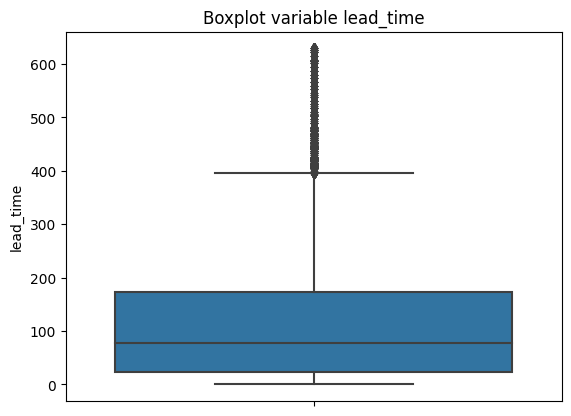

-200.5
395.5


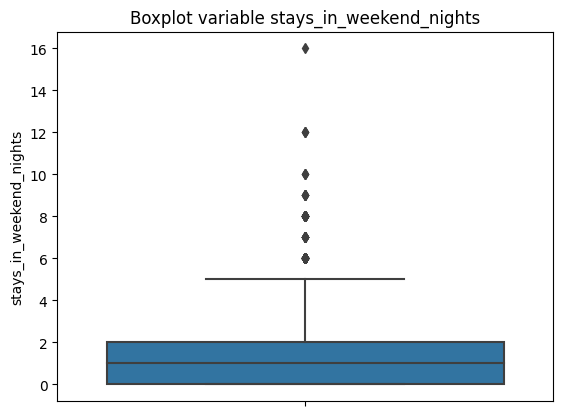

-3.0
5.0


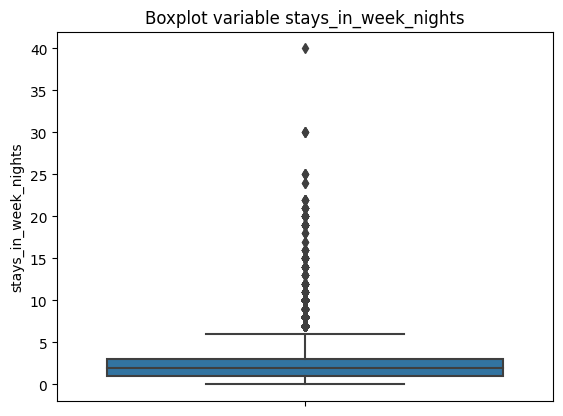

-2.0
6.0


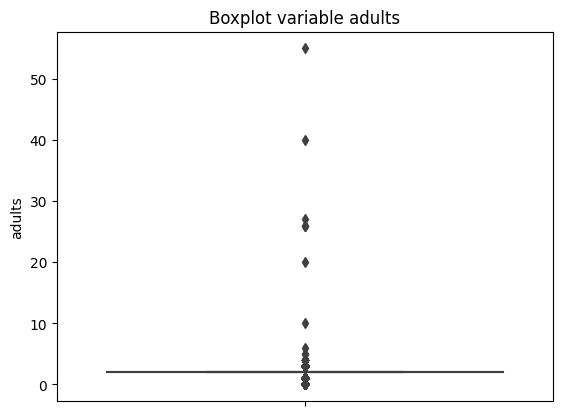

2.0
2.0


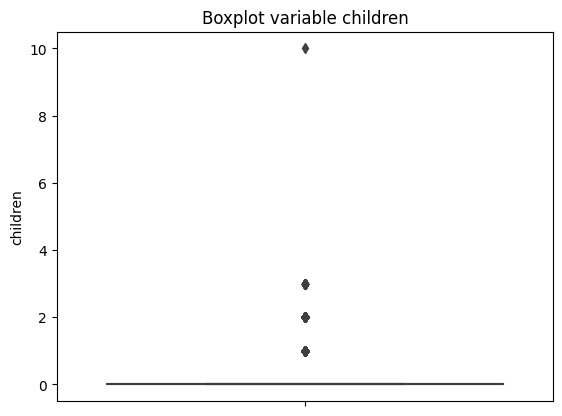

nan
nan


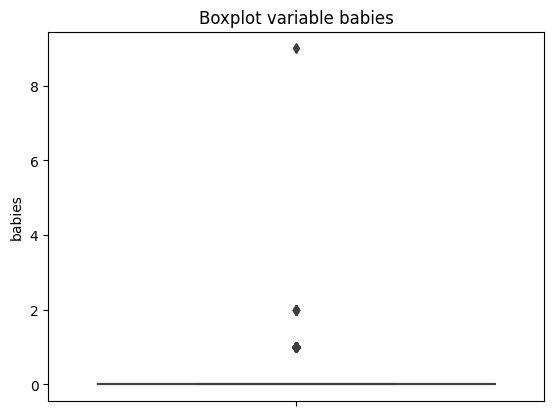

0.0
0.0


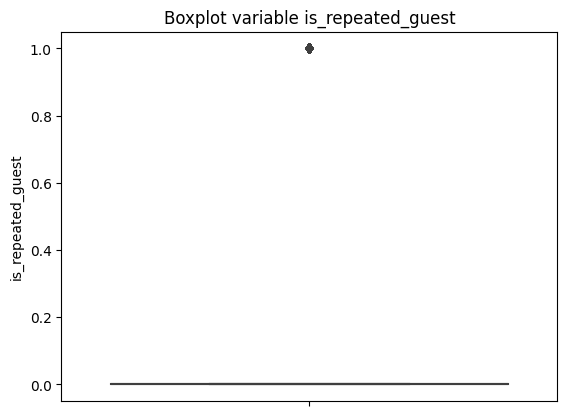

0.0
0.0


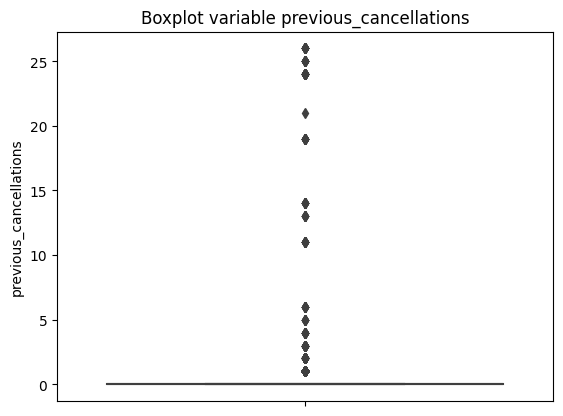

0.0
0.0


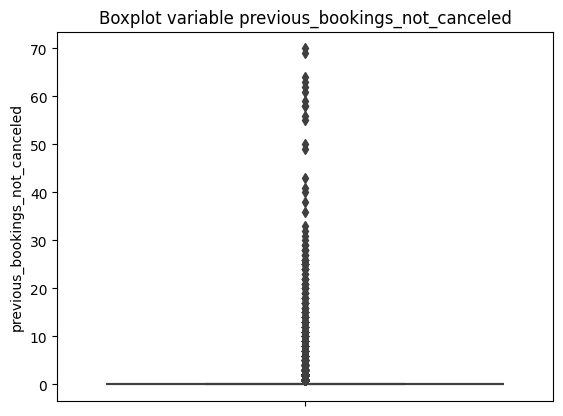

0.0
0.0


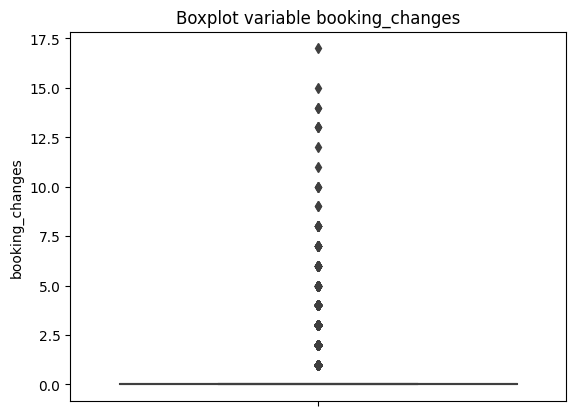

0.0
0.0


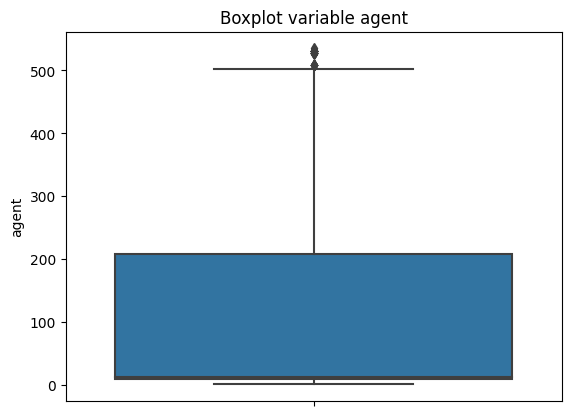

nan
nan


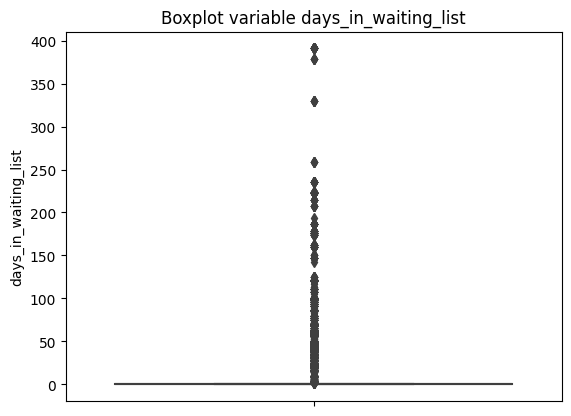

0.0
0.0


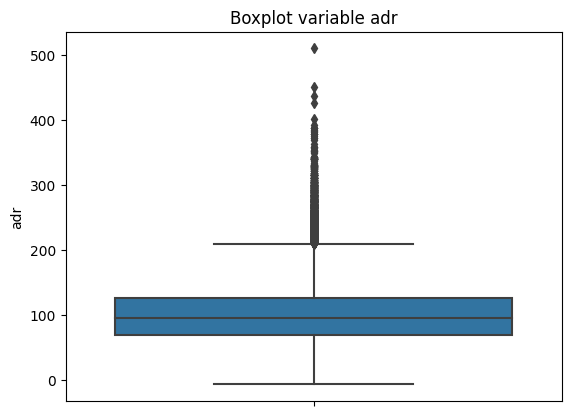

-14.0
210.0


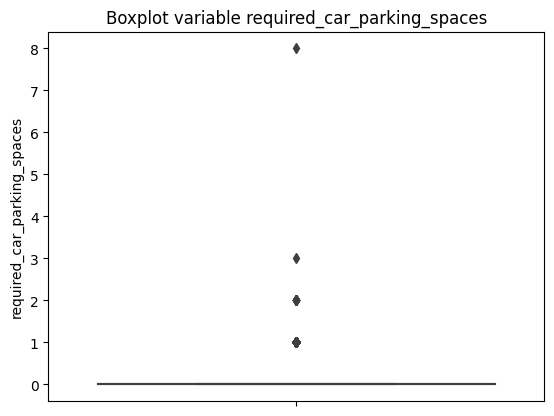

0.0
0.0


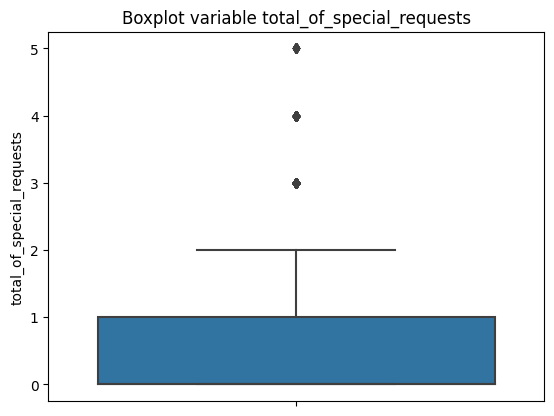

-1.5
2.5


In [ ]:
def graf_val_atipicos(ds, graficar):
    for col in graficar:
        grf = sns.boxplot(y=col, data=ds).set(title="Boxplot variable " + col, ylabel=col)
        plt.show()
        Q1=np.quantile(ds[col],0.25)
        Q3=np.quantile(ds[col],0.75)


        IQR=Q3-Q1


        out_sup=Q3+1.5*IQR
        out_inf=Q1-1.5*IQR
        print(out_inf)
        print(out_sup)
graf_val_atipicos(ds_atipico, tiene_atipicos)

# Analisis por variable de valores atipicos

In [ ]:
ds[ds["lead_time"] > 400]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
15,City Hotel,465,2017,July,30,26,0,3,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,229.0,NaN,0,Transient-Party,112.67,0,0,d73d9a15-bcb1-441e-9571-56cbdde0e670,1
51,City Hotel,489,2016,November,46,10,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1.0,NaN,0,Transient,62.80,0,0,264b4bdc-1f93-41dc-bad8-381405061cb1,1
82,City Hotel,412,2016,August,35,25,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1.0,NaN,0,Transient,62.00,0,0,29230190-f1d1-4d9e-90ec-d9d4a0755cfd,1
95,City Hotel,454,2016,October,41,6,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1.0,NaN,0,Transient,62.00,0,0,11de0e85-b5c6-4876-96b7-37c65f479ec5,1
99,City Hotel,420,2016,September,36,3,2,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,35.0,NaN,0,Transient,75.00,0,0,14d571b1-1cf3-4058-b50a-46367cd4f47e,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61753,City Hotel,433,2016,September,37,8,0,3,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,Non Refund,3.0,NaN,0,Transient,70.00,0,0,29a08da1-e707-4bd4-bbfe-ca55c19b7c3b,1
61761,City Hotel,496,2016,November,47,17,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1.0,NaN,0,Transient,62.80,0,0,159515de-2c06-41b2-8364-f34ddee5e1c6,1
61768,City Hotel,433,2016,September,38,15,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1.0,NaN,0,Transient,62.00,0,0,6f8bfdd6-6c76-449c-8ef4-ba22b2ece17c,1
61783,City Hotel,454,2016,October,41,6,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1.0,NaN,0,Transient,62.00,0,0,5e1faaa8-cf26-4e74-bc1f-0fbcbfe65c01,1


En este caso diria que si bien los valores que toma lead_time son inusuales (dado que es raro que alguien saque reserva con mas de un año de anticipación), no son tan bizarros como para concluir que alguno de ellos es un error por lo que no los voy a dejar

* stays_in_weekend_nights

In [ ]:
ds_s = ds[ds["stays_in_weekend_nights"] > 5]
ds_s

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
454,Resort Hotel,181,2017,March,9,1,6,19,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,440.0,NaN,0,Transient-Party,58.60,0,0,d24d57c2-23a1-4a34-b634-451e7db42031,1
1321,Resort Hotel,162,2016,March,10,4,6,15,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,96.0,NaN,0,Transient,82.00,0,0,d738b2cd-178c-4f0c-a26f-6ebcb1c0e971,1
1433,City Hotel,9,2016,January,5,28,6,17,1,0.0,0,BB,AGO,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,68.23,0,1,611c14b4-1751-4f6b-8a07-ab9270a29cc5,1
1930,Resort Hotel,203,2016,July,29,16,6,12,2,2.0,0,BB,PRT,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,240.0,NaN,0,Transient,204.44,0,0,1428c0a0-9774-41f6-ad72-a110db5fe380,1
2963,Resort Hotel,194,2017,April,15,15,6,15,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,47.50,0,2,07291cee-a8f4-4be5-8987-cb19a1905ffb,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60483,Resort Hotel,192,2017,January,2,14,10,25,2,0.0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,A,D,0,No Deposit,6.0,NaN,0,Transient,34.00,0,0,817e4b07-d56f-41d5-ac78-dc9f1ead3e35,0
60607,Resort Hotel,172,2016,January,3,12,8,20,2,0.0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,314.0,NaN,0,Contract,25.92,0,1,658bcc42-6c75-495c-9dca-08ba526a7388,0
61043,City Hotel,65,2016,November,47,19,8,21,2,2.0,0,BB,AGO,Online TA,TA/TO,0,0,0,F,F,0,No Deposit,9.0,NaN,0,Transient,171.30,0,0,5bc1e9ec-7947-41ea-8c0f-b82e13675ac5,1
61044,Resort Hotel,98,2017,February,6,8,6,15,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,96.0,NaN,0,Transient,37.80,0,0,11f019dd-f851-44fe-ad89-1070dab12a4b,1


In [ ]:
ds_s.groupby("stays_in_weekend_nights")["stays_in_week_nights"].value_counts()

stays_in_weekend_nights  stays_in_week_nights
6                        15                      41
                         19                      17
                         12                       9
                         13                       4
                         14                       4
                         16                       3
                         11                       2
                         17                       1
                         18                       1
7                        16                       5
                         19                       4
                         18                       2
                         15                       1
                         17                       1
8                        20                      18
                         21                       9
                         22                       6
                         19                       2
                  

Se puede ver que para valores altos en stays_in_weekend_nights se corresponden valores altos stays_in_week_nights por lo que me arriesgo a decir que no son errores

* stays_in_week_nights

In [ ]:
ds_s = ds[ds["stays_in_week_nights"] > 6]
ds_s

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
6,Resort Hotel,112,2015,November,46,12,4,9,2,0.0,0,HB,FRA,Offline TA/TO,TA/TO,0,0,0,D,D,1,No Deposit,314.0,NaN,0,Contract,66.42,0,1,c7e59753-c8a7-42eb-977b-f0ffaf1716eb,0
94,City Hotel,191,2017,June,24,17,4,8,2,0.0,0,BB,MAR,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,130.50,0,1,fb3af24b-c5a4-4830-afb4-fa01a2627873,1
169,City Hotel,14,2016,March,10,4,2,7,2,0.0,0,HB,CHN,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,132.33,0,0,57545b14-3f84-4c08-88ec-ba8db03150a2,1
191,City Hotel,237,2017,July,27,3,3,8,2,0.0,0,BB,BEL,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,107.10,0,2,62cd4d63-8d67-48de-b69a-ddcb2e97de92,1
194,Resort Hotel,37,2015,August,35,24,3,7,2,0.0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,E,E,0,No Deposit,175.0,NaN,0,Transient,133.76,0,0,4f7c00c2-abf3-49c1-835b-bb7f05e6ca61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61747,Resort Hotel,321,2017,March,10,8,4,10,2,0.0,0,HB,NLD,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,66.60,0,1,4df87107-4266-4829-ab48-4ad6b2c23db4,1
61750,City Hotel,64,2017,March,11,15,2,8,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,8.0,NaN,0,Transient,100.30,0,1,43cbc189-fd56-4397-a7e2-726a452b2f0f,1
61840,Resort Hotel,31,2015,November,45,2,5,11,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,281.0,NaN,0,Transient-Party,40.00,0,0,32eeaf87-a22e-45fa-a019-6e98c3dea3b1,1
61865,Resort Hotel,153,2015,September,38,17,4,10,2,0.0,0,HB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,243.0,NaN,0,Contract,61.65,0,0,9ce8aa7f-e944-4e81-9000-fff58e98aedf,0


In [ ]:
ds_s.groupby("stays_in_week_nights")["stays_in_weekend_nights"].value_counts()

stays_in_week_nights  stays_in_weekend_nights
7                     2                          234
                      3                          202
                      4                           93
8                     2                          207
                      4                           76
                      3                           62
9                     2                           44
                      4                           44
                      3                           34
10                    4                          452
                      3                           27
                      5                           18
                      2                           11
11                    4                           16
                      5                            9
                      6                            2
12                    4                           15
                      6                            9


Como era de esperarse lo valores entre stays_in_weekend_nights y tays_in_week_nights se corresponden entre si

* adults

In [ ]:
ds_s = ds[ds["adults"] > 2]
ds_i = ds[ds["adults"] < 2]

In [ ]:
ds_s.adults.value_counts()

3     3164
4       30
26       3
5        2
40       1
20       1
6        1
10       1
27       1
55       1
Name: adults, dtype: int64

Dado que son tan pocos voy a borrar los valores adults mayores a 5

In [ ]:
indices = ds[ds["adults"] > 5].index
ds.drop(indices, inplace=True)

In [ ]:
ds_i.adults.value_counts()

1    11549
0      197
Name: adults, dtype: int64

Dado que no tiene sentidos que haya grupos de huespedes sin adultos voy a borrar esas filas

In [ ]:
indices = ds[ds["adults"] == 0].index
ds.drop(indices, inplace=True)

* children

In [ ]:
ds.children.value_counts()

0.0     57372
1.0      2456
2.0      1839
3.0        35
10.0        1
Name: children, dtype: int64

In [ ]:
ds[ds["children"] > 2]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
481,City Hotel,145,2016,August,32,4,0,3,2,3.0,0,BB,POL,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,8.0,NaN,0,Transient,269.30,0,1,c5ca8a03-6e90-4165-853e-a7437487410c,0
669,City Hotel,147,2017,May,21,24,0,4,2,3.0,0,BB,BEL,Direct,Direct,0,0,0,G,G,0,No Deposit,14.0,NaN,0,Transient,250.00,0,0,467f8f84-b213-402c-a9c4-248efc7aa186,1
772,City Hotel,1,2017,July,28,10,1,0,2,3.0,0,BB,USA,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,7.0,NaN,0,Transient,264.44,0,1,5442bcf9-fd44-4e1f-a053-6f402d0bdf51,0
5549,City Hotel,139,2017,August,33,15,0,4,2,3.0,0,HB,ESP,Direct,Direct,0,0,0,G,G,0,No Deposit,NaN,14.0,0,Transient,300.00,0,1,9e9d1fea-5e54-4b42-bf3e-5ab132607c25,0
5915,City Hotel,25,2016,July,28,4,1,1,2,3.0,0,BB,NOR,Direct,Direct,0,0,0,G,G,0,No Deposit,14.0,NaN,0,Transient,226.95,0,1,620ec99c-8b53-43e7-ba9b-bcfdee340b3a,0
8197,City Hotel,12,2017,February,6,9,1,3,2,3.0,0,HB,PRT,Online TA,TA/TO,0,0,0,G,G,1,No Deposit,83.0,NaN,0,Transient,238.40,0,0,9fd50121-86c2-420e-9d40-587c783147b7,1
9054,City Hotel,3,2017,February,8,19,2,2,2,3.0,0,BB,FRA,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,7.0,NaN,0,Transient,207.22,0,1,041e6896-78d0-4f57-87aa-06f04f10f909,0
11077,City Hotel,11,2016,July,28,4,1,0,2,3.0,0,BB,USA,Direct,Direct,0,0,0,G,G,0,No Deposit,NaN,NaN,0,Transient,267.00,0,3,3de76da7-158a-4487-bc08-9c6e0bfcb15d,0
16154,City Hotel,101,2017,July,27,6,2,4,2,3.0,0,BB,FIN,Direct,Direct,0,0,0,G,G,1,No Deposit,14.0,NaN,0,Transient,255.00,0,0,45307d56-389a-4246-ac58-2ff70f9c2200,0
17732,Resort Hotel,8,2016,June,26,23,0,2,2,3.0,0,BB,USA,Direct,Direct,0,0,0,H,H,0,No Deposit,250.0,NaN,0,Transient,186.00,1,0,2ab8ea4f-48b2-4a27-b4d8-fa19953719d6,0


Dado que ninguno de estos valores son muy raros los voy a dejar

* babies

In [ ]:
ds[ds["babies"] > 0]["babies"].value_counts()

1    419
2      7
9      1
Name: babies, dtype: int64

In [ ]:
ds[ds["babies"] == 9]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
12659,City Hotel,11,2015,October,42,11,2,1,1,0.0,9,BB,GBR,Corporate,Corporate,0,0,0,A,B,1,No Deposit,95.0,NaN,0,Transient-Party,95.0,0,0,a864cf91-980a-48da-9b71-c0b487096239,0


Dado que es absurdo que un solo adulto cuide a 9 bebes voy a borrar esa fila

In [ ]:
indices = ds[ds["babies"] == 9].index
ds.drop(indices, inplace=True)

* is_repeated_guest

Es un variable discreta binaria por lo que este analisis no serveria para detectar valores atipicos

* previous_cancellations

In [ ]:
ds_s = ds[ds["previous_cancellations"] > 5]

In [ ]:
ds_s.groupby("previous_cancellations")["previous_bookings_not_canceled"].value_counts()

previous_cancellations  previous_bookings_not_canceled
6                       0                                  3
                        58                                 2
                        59                                 1
                        61                                 1
                        62                                 1
                        63                                 1
                        64                                 1
                        69                                 1
                        70                                 1
11                      25                                 5
                        0                                  3
                        4                                  2
                        22                                 2
                        5                                  1
                        10                                 1
                        20    

Diria que no tienen sentido los casos con muchas cancelaciones sin ninguna reserva no cancelada por lo que lo voy a eliminar esos casos

In [ ]:
indices = ds[(ds["previous_cancellations"] > 5) & (ds["previous_bookings_not_canceled"] == 0)].index
ds.drop(indices, inplace=True)

* previous_bookings_not_canceled

In [ ]:
ds["previous_bookings_not_canceled"].value_counts()

0     60375
1       631
2       258
3       151
4       103
5        79
6        44
8        29
7        29
10       24
9        23
11       21
13       19
12       14
14       12
25       10
15        9
17        8
18        7
24        6
20        5
22        5
26        5
16        4
19        4
28        4
21        4
27        3
29        3
23        2
58        2
56        1
32        1
69        1
63        1
36        1
59        1
31        1
49        1
30        1
50        1
41        1
43        1
61        1
55        1
33        1
70        1
38        1
62        1
40        1
64        1
Name: previous_bookings_not_canceled, dtype: int64

Con la variable *previous_bookings_not_canceled* no tiene sentido deshacerse de los outliers ya que no nos afecta en el momento del analisis. Lo que podriamos concluir en un futuro es como a partir de cierto valor mayor a 0 las conclusiones que podemos sacar son las mismas.

In [ ]:
ds[ds["previous_bookings_not_canceled"] > 10]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
349,City Hotel,1,2017,July,27,5,0,1,1,0.0,0,BB,PRT,Complementary,Corporate,1,4,17,A,A,0,No Deposit,NaN,45.0,0,Transient,0.0,0,3,25855dea-20fc-4804-8549-39203b04a494,1
1579,City Hotel,190,2016,April,15,9,1,1,2,0.0,0,BB,PRT,Groups,TA/TO,0,11,25,A,A,0,No Deposit,NaN,NaN,31,Transient-Party,70.0,0,0,89c0e220-c141-4640-bf2e-6d09b4b5a9da,1
1661,Resort Hotel,0,2017,April,15,11,0,1,1,0.0,0,BB,PRT,Corporate,Corporate,1,1,25,A,F,0,No Deposit,88.0,NaN,0,Transient,45.0,0,0,93e70427-5d1a-444f-969e-2cccd4e69312,0
1882,City Hotel,0,2017,August,33,15,0,1,1,0.0,0,BB,PRT,Complementary,Direct,1,5,20,A,A,0,No Deposit,NaN,45.0,0,Transient,0.0,0,3,485e75c9-3e37-46ef-8ab4-07f49af78146,0
2649,City Hotel,7,2017,May,20,15,1,1,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,13,A,A,0,No Deposit,NaN,40.0,0,Transient,65.0,0,2,7e2d06bc-8f99-460b-a92b-ca5d053c791e,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60793,Resort Hotel,117,2017,April,15,13,0,3,1,0.0,0,BB,PRT,Online TA,Direct,1,4,11,A,A,0,No Deposit,NaN,NaN,0,Transient,61.5,0,4,aca30dd0-6db4-411a-8f4f-5901ec888841,1
61042,City Hotel,3,2016,April,16,11,1,0,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,14,A,A,0,No Deposit,NaN,40.0,0,Transient,65.0,0,1,fd4f0e5a-e0e5-4c08-90ee-ca442ee630a8,0
61115,City Hotel,4,2017,May,18,1,1,0,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,12,A,A,0,No Deposit,NaN,40.0,0,Transient,65.0,0,2,897fc748-3627-4e95-99fd-a2d48dceedb0,0
61142,Resort Hotel,1,2017,January,2,13,1,2,1,0.0,0,BB,PRT,Corporate,TA/TO,1,0,13,A,A,1,No Deposit,NaN,390.0,0,Transient,35.0,0,1,87b40726-38c0-4932-96ee-203f88a57447,0


In [ ]:
ds_s = ds[ds["previous_bookings_not_canceled"] > 0]
ds_s["is_repeated_guest"].value_counts

<bound method IndexOpsMixin.value_counts of 63       1
139      0
227      1
249      1
267      1
        ..
61664    1
61777    1
61818    1
61891    1
61900    1
Name: is_repeated_guest, Length: 1534, dtype: int64>

Puede ser que haya hecho varias reservas antes de estar en el hotel?

* booking_changes

Estos valores no tienen nada de inusual ya hacer cambios a una reserva no es dificil y se podria llegar a relizar cuantas veces uno quiera

* agent

En realidad es una variable cualitativa 

* days_in_waiting_list

In [ ]:
ds[ds["days_in_waiting_list"] > 0]["is_canceled"].value_counts()

1    1637
0     592
Name: is_canceled, dtype: int64

Tiene sentido que mientras se tarda en confirmar la reserva alla mayor cantidad de cancelaciones. Por otra parte es extraño que espera mas de un mes para una reserva de hotel. Por lo tanto podemos concluir que los outliers no nos afectan en el analisis, ya que al igual que *previous_bookings_not_canceled* a partir de cierto valor que podamos tomar en un futura la conclusion seria la misma.

* adr

Utilizando el z_score calculado previamente podemos encontrar los outliers de adr


In [ ]:
ds_atipico["adr"].describe()

count    61913.000000
mean       102.383773
std         47.757640
min         -6.380000
25%         70.000000
50%         95.000000
75%        126.000000
max        510.000000
Name: adr, dtype: float64

In [ ]:
ds_atipico[ds_atipico["z_adr"] > 3]["adr"].describe()

count    774.000000
mean     278.118463
std       31.900086
min      245.670000
25%      254.077500
50%      269.000000
75%      292.300000
max      510.000000
Name: adr, dtype: float64

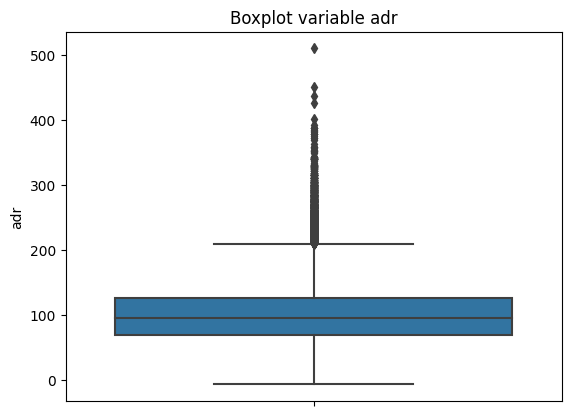

In [ ]:
grf = sns.boxplot(y="adr", data=ds).set(title="Boxplot variable adr", ylabel="adr")
plt.show()

In [ ]:
ds_atipico[ds_atipico["adr"] > 400]["adr"].info()

<class 'pandas.core.series.Series'>
Int64Index: 5 entries, 8690 to 60071
Series name: adr
Non-Null Count  Dtype  
--------------  -----  
5 non-null      float64
dtypes: float64(1)
memory usage: 80.0 bytes


Como simplemente 5 valores de adr superan los 400 es probable que estos no nos esten aprotando mucha informacion y nos afecten en la deteccion de otros outliers multivariados.

* required_car_parking_spaces

In [ ]:
ds[ds["required_car_parking_spaces"] > ds["adults"]]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
8269,Resort Hotel,138,2017,March,12,19,2,2,2,0.0,0,HB,AUT,Direct,Corporate,1,0,2,E,F,1,No Deposit,NaN,NaN,122,Transient-Party,80.0,8,0,174365a6-2548-48c4-ae12-7842d5498f12,0
13713,Resort Hotel,205,2017,June,26,26,3,10,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,2,No Deposit,250.0,NaN,0,Transient,111.0,3,0,4267af65-0a89-4489-b099-e0332c6c51fe,0


Como no tiene sentido que haya mas vehiculos que adultos voy a borrar esas filas

In [ ]:
indices = ds[ds["required_car_parking_spaces"] > ds["adults"]].index
ds.drop(indices, inplace=True)

* total_of_special_requests

Valores normales

# Analisis Multivariado

Para empezar el analisis multivariado vamos a comparar las variables:


*  *adr* y *days_in_waiting_list*


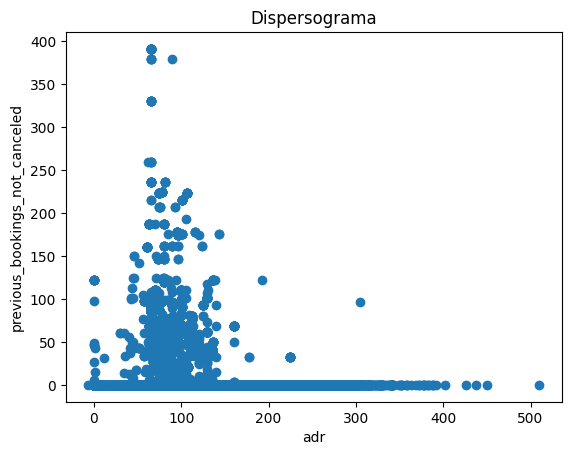

In [ ]:
plt.scatter(ds.adr,ds.days_in_waiting_list)
plt.title('Dispersograma')
plt.xlabel('adr')
plt.ylabel('previous_bookings_not_canceled')
plt.show()

Vamos a intentar detectar outliers multivariados utilizando Isolation Forests.


In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import IsolationForest

iforest = IsolationForest(n_estimators=200, max_samples='auto', 
                          contamination=0.001, max_features=2, 
                          bootstrap=False, n_jobs=-1, random_state=1)

#Entreno y genero la predicción
ds_nuevo = ds.loc[:, ['adr', 'previous_bookings_not_canceled']].copy()
pred= iforest.fit_predict(ds_nuevo)

#Almaceno scores y etiquetas
ds_nuevo['scores']=iforest.decision_function(ds_nuevo)
ds_nuevo['outlier_label']=pred

#Observaciones anómalas
ds_nuevo[ds_nuevo.outlier_label==-1]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,adr,previous_bookings_not_canceled,scores,outlier_label
349,0.0,17,-0.006838,-1
1579,70.0,25,-0.005620,-1
1661,45.0,25,-0.002660,-1
1882,0.0,20,-0.012444,-1
4698,0.0,20,-0.012444,-1
...,...,...,...,...
53226,67.0,26,-0.004158,-1
53334,65.0,24,-0.001952,-1
54846,35.0,25,-0.002571,-1
54997,65.0,27,-0.005317,-1


In [ ]:
#Cantidad de obs. anómalas
ds_nuevo.outlier_label.value_counts()

 1    61851
-1       62
Name: outlier_label, dtype: int64

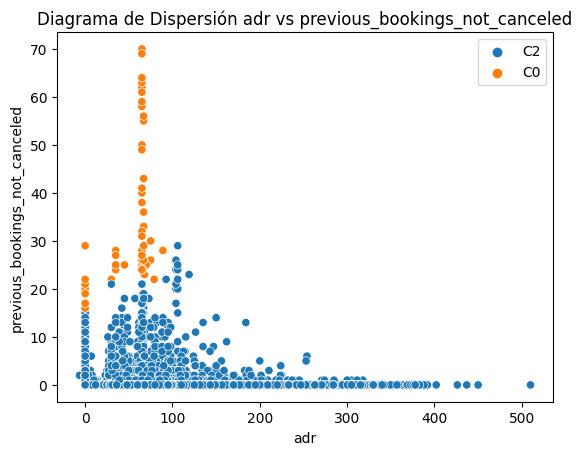

In [ ]:
#Grafico dispersograma
color=[f"C{n+1}" for n in (ds_nuevo['outlier_label'].values)]

sns.scatterplot(x=ds_nuevo['adr'], y=ds_nuevo['previous_bookings_not_canceled'], hue=color)
plt.title('Diagrama de Dispersión adr vs previous_bookings_not_canceled')
plt.show()

* *adr* vs *previous_bookings_not_canceled*


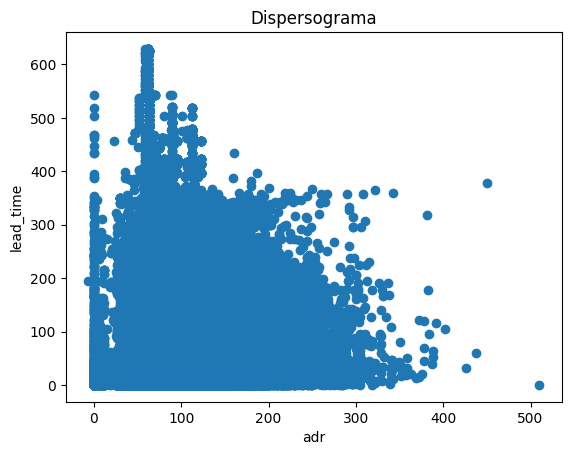

In [ ]:
plt.scatter(ds.adr,ds.lead_time)
plt.title('Dispersograma')
plt.xlabel('adr')
plt.ylabel('lead_time')
plt.show()

In [ ]:
iforest2 = IsolationForest(n_estimators=200, max_samples='auto', 
                          contamination=0.007, max_features=2, 
                          bootstrap=False, n_jobs=-1, random_state=1)

#Entreno y genero la predicción
ds_nuevo_2 = ds.loc[:, ['adr', 'lead_time']].copy()
pred= iforest2.fit_predict(ds_nuevo_2)

#Almaceno scores y etiquetas
ds_nuevo_2['scores']=iforest2.decision_function(ds_nuevo_2)
ds_nuevo_2['outlier_label']=pred

#Observaciones anómalas
ds_nuevo_2[ds_nuevo_2.outlier_label==-1]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,adr,lead_time,scores,outlier_label
320,289.6,212,-0.027906,-1
426,90.0,521,-0.006273,-1
576,62.8,626,-0.022894,-1
684,340.0,47,-0.009209,-1
685,62.0,573,-0.011886,-1
...,...,...,...,...
61305,62.0,622,-0.021662,-1
61452,330.0,8,-0.014343,-1
61579,51.4,517,-0.008649,-1
61745,300.4,205,-0.027379,-1


In [ ]:
#Cantidad de obs. anómalas
ds_nuevo_2.outlier_label.value_counts()

 1    61487
-1      426
Name: outlier_label, dtype: int64

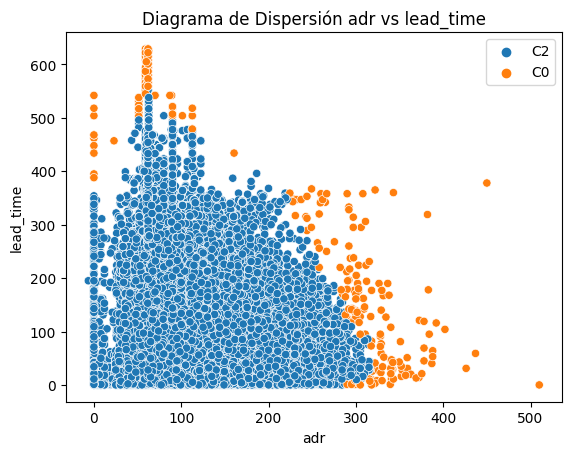

In [ ]:
#Grafico dispersograma
color=[f"C{n+1}" for n in (ds_nuevo_2['outlier_label'].values)]

sns.scatterplot(x=ds_nuevo_2['adr'], y=ds_nuevo_2['lead_time'], hue=color)
plt.title('Diagrama de Dispersión adr vs lead_time')
plt.show()

* *stays_in_week_nights* vs *previous_cancellations*

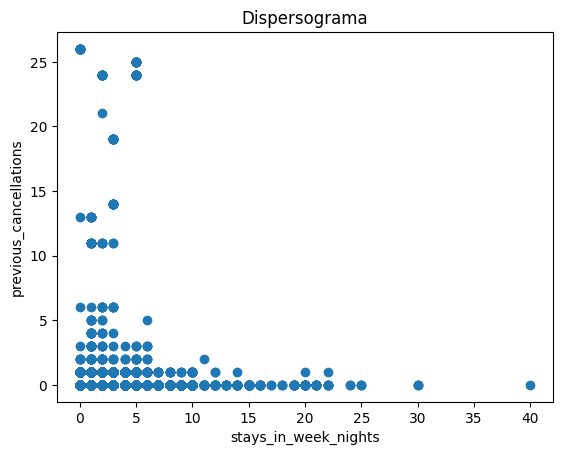

In [ ]:
plt.scatter(ds.stays_in_week_nights,ds.previous_cancellations)
plt.title('Dispersograma')
plt.xlabel('stays_in_week_nights')
plt.ylabel('previous_cancellations')
plt.show()

In [ ]:
iforest3 = IsolationForest(n_estimators=200, max_samples='auto', 
                          contamination=0.001, max_features=2, 
                          bootstrap=False, n_jobs=-1, random_state=1)

#Entreno y genero la predicción
ds_nuevo_3 = ds.loc[:, ['stays_in_week_nights', 'previous_cancellations']].copy()
pred= iforest3.fit_predict(ds_nuevo_3)

#Almaceno scores y etiquetas
ds_nuevo_3['scores']=iforest3.decision_function(ds_nuevo_3)
ds_nuevo_3['outlier_label']=pred

#Observaciones anómalas
ds_nuevo_3[ds_nuevo_3.outlier_label==-1]

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,stays_in_week_nights,previous_cancellations,scores,outlier_label
152,0,26,-0.028336,-1
802,0,26,-0.028336,-1
1640,5,25,-0.026136,-1
1837,0,26,-0.028336,-1
2511,5,24,-0.026407,-1
...,...,...,...,...
57787,0,26,-0.028336,-1
58340,0,26,-0.028336,-1
58747,5,24,-0.026407,-1
59761,5,24,-0.026407,-1


In [ ]:
#Cantidad de obs. anómalas
ds_nuevo_3.outlier_label.value_counts()

 1    61851
-1       62
Name: outlier_label, dtype: int64

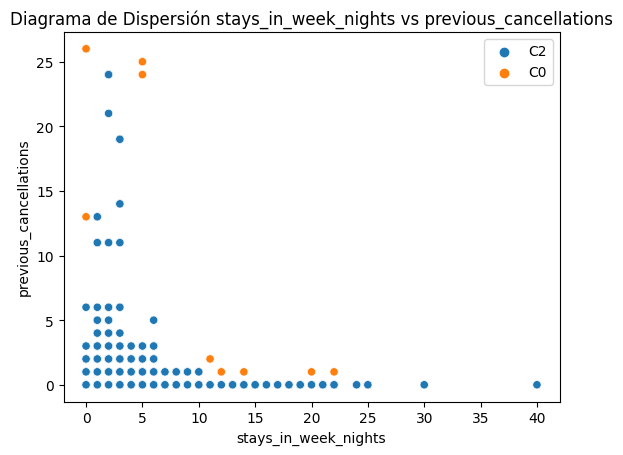

In [ ]:
#Grafico dispersograma
color=[f"C{n+1}" for n in (ds_nuevo_3['outlier_label'].values)]

sns.scatterplot(x=ds_nuevo_3['stays_in_week_nights'], y=ds_nuevo_3['previous_cancellations'], hue=color)
plt.title('Diagrama de Dispersión stays_in_week_nights vs previous_cancellations')
plt.show()

* *children* vs *adr*

"plt.scatter(ds.stays_in_week_nights,ds.previous_cancellations)\nplt.title('Dispersograma')\nplt.xlabel('stays_in_week_nights')\nplt.ylabel('previous_cancellations')\nplt.show()"

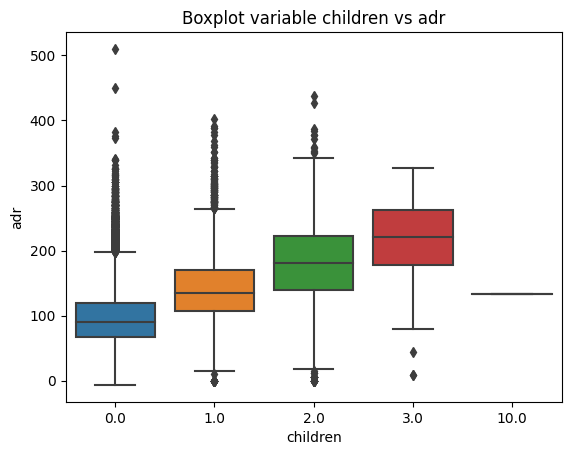

In [ ]:
grf=sns.boxplot(y="adr",x="children" , data=ds).set(title="Boxplot variable children vs adr",xlabel="children",ylabel="adr")

In [ ]:
iforest4 = IsolationForest(n_estimators=200, max_samples='auto', 
                          contamination=0.001, max_features=2, 
                          bootstrap=False, n_jobs=-1, random_state=1)

#Entreno y genero la predicción
ds_nuevo_4 = ds_hotels.loc[:, ['adr', 'children']].copy()
print(ds_nuevo_4)
pred= iforest4.fit_predict(ds_nuevo_4)

#Almaceno scores y etiquetas
ds_nuevo_4['scores']=iforest4.decision_function(ds_nuevo_4)
ds_nuevo_4['outlier_label']=pred

#Observaciones anómalas
ds_nuevo_4[ds_nuevo_4.outlier_label==-1]

          adr  children
0      115.50       0.0
1       42.00       0.0
2      229.00       2.0
3       75.00       0.0
4       75.00       0.0
...       ...       ...
61908   48.00       0.0
61909  149.00       0.0
61910   95.00       0.0
61911   36.05       0.0
61912  143.29       0.0

[61913 rows x 2 columns]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,adr,children,scores,outlier_label
1271,353.00,2.0,-0.006998,-1
3838,351.00,2.0,-0.006998,-1
5184,378.00,2.0,-0.006998,-1
5549,300.00,3.0,-0.016428,-1
5804,311.00,2.0,-0.000258,-1
6293,311.50,2.0,-0.000258,-1
8688,318.00,2.0,-0.000774,-1
8690,426.25,2.0,-0.008562,-1
8890,372.33,2.0,-0.006998,-1
9195,331.33,2.0,-0.006477,-1


In [ ]:
#Cantidad de obs. anómalas
ds_nuevo_4.outlier_label.value_counts()

 1    61855
-1       58
Name: outlier_label, dtype: int64

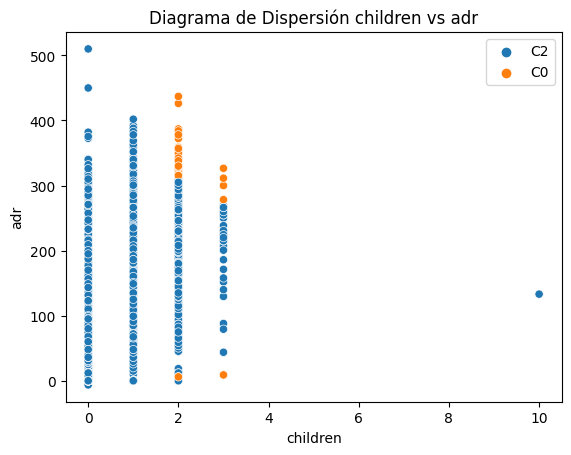

In [ ]:
#Grafico dispersograma
color=[f"C{n+1}" for n in (ds_nuevo_4['outlier_label'].values)]

sns.scatterplot(x=ds_nuevo_4['children'], y=ds_nuevo_4['adr'], hue=color)
plt.title('Diagrama de Dispersión children vs adr')
plt.show()

* *is_repeated_guest* vs *previous_booking_not_canceled*


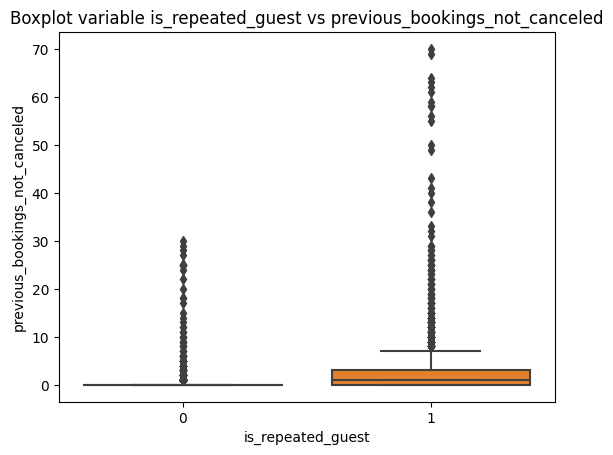

In [107]:
grf=sns.boxplot(y="previous_bookings_not_canceled",x="is_repeated_guest" , data=ds).set(title="Boxplot variable is_repeated_guest vs previous_bookings_not_canceled",xlabel="is_repeated_guest",ylabel="previous_bookings_not_canceled")

In [108]:
iforest5 = IsolationForest(n_estimators=200, max_samples='auto', 
                          contamination=0.0005, max_features=2, 
                          bootstrap=False, n_jobs=-1, random_state=1)

#Entreno y genero la predicción
ds_nuevo_5 = ds_hotels.loc[:, ['previous_bookings_not_canceled', 'is_repeated_guest']].copy()
print(ds_nuevo_5)
pred= iforest5.fit_predict(ds_nuevo_5)

#Almaceno scores y etiquetas
ds_nuevo_5['scores']=iforest5.decision_function(ds_nuevo_5)
ds_nuevo_5['outlier_label']=pred

#Observaciones anómalas
ds_nuevo_5[ds_nuevo_5.outlier_label==-1]
ds_nuevo_5.head()

       previous_bookings_not_canceled  is_repeated_guest
0                                   0                  0
1                                   0                  0
2                                   0                  0
3                                   0                  0
4                                   0                  0
...                               ...                ...
61908                               0                  0
61909                               0                  0
61910                               0                  0
61911                               0                  0
61912                               0                  0

[61913 rows x 2 columns]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,previous_bookings_not_canceled,is_repeated_guest,scores,outlier_label
0,0,0,0.428099,1
1,0,0,0.428099,1
2,0,0,0.428099,1
3,0,0,0.428099,1
4,0,0,0.428099,1


In [109]:
#Cantidad de obs. anómalas
ds_nuevo_5.outlier_label.value_counts()

 1    61890
-1       23
Name: outlier_label, dtype: int64

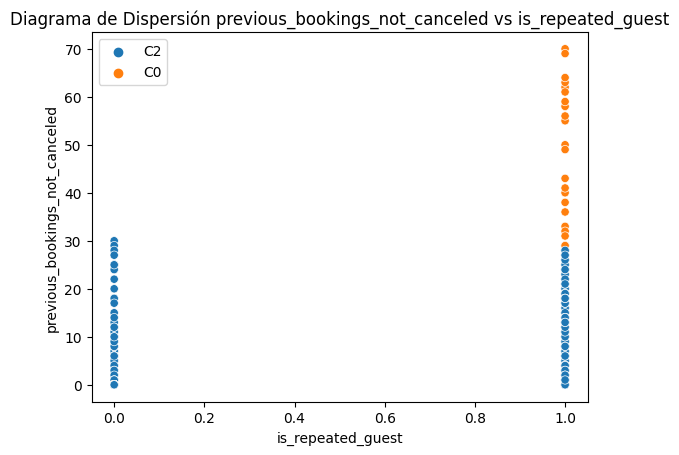

In [110]:
#Grafico dispersograma
color=[f"C{n+1}" for n in (ds_nuevo_5['outlier_label'].values)]

sns.scatterplot(x=ds_nuevo_5['is_repeated_guest'], y=ds_nuevo_5['previous_bookings_not_canceled'], hue=color)
plt.title('Diagrama de Dispersión previous_bookings_not_canceled vs is_repeated_guest')
plt.show()

Los Outliers encontrados previamente pueden ser eliminados del dataset para mejorar el analisis de datos.